In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

from dateutil.relativedelta import relativedelta

In [3]:
Orders = pd.read_csv('ORDERS.csv')
Order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
Products = pd.read_csv('PRODUCTS.csv')
Order_items = pd.read_csv('ORDER_ITEMS.csv')
Geo_location = pd.read_csv('GEO_LOCATION.csv')
Seller = pd.read_csv('SELLERS.csv')
Customers = pd.read_csv('CUSTOMERS.csv')
Order_reviews = pd.read_csv('ORDER_REVIEW_RATINGS.csv')

**Merging Order and Order_payments data files to get some insights about the revenue.**

In [4]:
Order_data = pd.merge(Orders, Order_payments, how ='inner', left_on = 'order_id', right_on = 'order_id')
Order_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,credit_card,4,441.16


In [5]:
#Missing values Analysis
Order_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [6]:
Order_data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
dtype: object

# Finding out some High Level Metrics from the merged data.

In [7]:
Order_data_few = Order_data[['order_id','customer_id','order_status','payment_type','payment_installments','payment_value']]
Order_data_few

,order_id,customer_id,order_status,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,credit_card,3,179.12
...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,credit_card,4,441.16


In [8]:
Total_Revenue = Order_data_few.payment_value.sum()
Total_customers = Order_data_few.customer_id.nunique()
Total_Products = Products.product_id.nunique()
Total_categories = Products.product_category_name.nunique()
Total_sellers = Seller.seller_id.nunique()
Total_customer_locations = Customers.customer_city.nunique()
Total_seller_locations = Seller.seller_city.nunique()
Total_payment_method = Order_payments.payment_type.nunique()
temp_1 = {'Metrics': ['Total_Revenue','Total_customers','Total_Products','Total_categories','Total_sellers','Total_customer_locations',
          'Total_seller_locations','Total_payment_method'],
          'Values': [Total_Revenue,Total_customers,Total_Products,Total_categories,Total_sellers,Total_customer_locations,Total_seller_locations,Total_payment_method]}
Metrics = pd.DataFrame.from_dict(temp_1)
Metrics

,Metrics,Values
0,Total_Revenue,16008872.12
1,Total_customers,99440.00
2,Total_Products,32951.00
3,Total_categories,71.00
4,Total_sellers,3095.00
5,Total_customer_locations,4119.00
6,Total_seller_locations,534.00
7,Total_payment_method,5.00


In [9]:
Order_data.notna().sum()

order_id                         103886
customer_id                      103886
order_status                     103886
order_purchase_timestamp         103886
order_approved_at                103711
order_delivered_carrier_date     101998
order_delivered_customer_date    100754
order_estimated_delivery_date    103886
payment_sequential               103886
payment_type                     103886
payment_installments             103886
payment_value                    103886
dtype: int64

In [10]:
#Convert the datatype of Order purchase timestamp from string to datetime.
Order_data.order_purchase_timestamp

0         10/2/2017 10:56
1         10/2/2017 10:56
2         10/2/2017 10:56
3         7/24/2018 20:41
4           8/8/2018 8:38
               ...       
103881      3/9/2017 9:54
103882     2/6/2018 12:58
103883    8/27/2017 14:46
103884     1/8/2018 21:28
103885     3/8/2018 20:57
Name: order_purchase_timestamp, Length: 103886, dtype: object

In [11]:
Order_data['order_purchase_timestamp'] =  pd.to_datetime(Order_data['order_purchase_timestamp'], format='%m/%d/%Y %H:%M')

In [12]:
Order_data['year'] = pd.to_datetime(Order_data['order_purchase_timestamp']).dt.year
Order_data['month'] = pd.to_datetime(Order_data['order_purchase_timestamp']).dt.month
Order_data['week'] = pd.to_datetime(Order_data['order_purchase_timestamp']).dt.week
Order_data['day'] = pd.to_datetime(Order_data['order_purchase_timestamp']).dt.day

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_5060/642773259.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Order_data['week'] = pd.to_datetime(Order_data['order_purchase_timestamp']).dt.week


In [13]:
Order_data_temp = Order_data.sort_values(by = ['year','month'], ascending = ['False','False'])
Order_data_temp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,year,month,week,day
4577,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:00,10/7/2016 13:17,NaN,NaN,10/28/2016 0:00,1,credit_card,3,75.06,2016,9,36,5
4722,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:00,10/7/2016 13:18,10/18/2016 13:14,NaN,10/20/2016 0:00,1,credit_card,1,136.23,2016,9,35,4
10525,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:00,10/7/2016 13:16,NaN,NaN,9/30/2016 0:00,1,credit_card,2,40.95,2016,9,37,13
340,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:00,10/6/2016 15:51,NaN,NaN,12/9/2016 0:00,1,credit_card,1,299.84,2016,10,40,5
400,cbbb524a0e1646aa6cf7a3c0bbe517ad,dacb079d55ffb1d3955c5d923df3ebb7,delivered,2016-10-05 07:31:00,10/6/2016 2:46,10/10/2016 2:46,10/16/2016 14:36,12/7/2016 0:00,1,UPI,1,95.58,2016,10,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103790,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:00,NaN,NaN,NaN,9/27/2018 0:00,1,voucher,1,107.13,2018,9,36,6
33376,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:00,NaN,NaN,NaN,10/16/2018 0:00,1,voucher,1,197.55,2018,10,40,3
63651,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:00,NaN,NaN,NaN,10/30/2018 0:00,1,voucher,1,89.71,2018,10,42,17
71373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:00,NaN,NaN,NaN,11/12/2018 0:00,1,voucher,1,222.03,2018,10,42,16


# Understanding how many new customers acquired every month.

In [14]:
Data_cust_year = Order_data_temp[['customer_id','year','month','payment_value']]
Data_cust_year

,customer_id,year,month,payment_value
4577,683c54fc24d40ee9f8a6fc179fd9856c,2016,9,75.06
4722,08c5351a6aca1c1589a38f244edeee9d,2016,9,136.23
10525,622e13439d6b5a0b486c435618b2679e,2016,9,40.95
340,957f8e082185574de25992dc659ebbc0,2016,10,299.84
400,dacb079d55ffb1d3955c5d923df3ebb7,2016,10,95.58
...,...,...,...,...
103790,2f0524a7b1b3845a1a57fcf3910c4333,2018,9,107.13
33376,4c2ec60c29d10c34bd49cb88aa85cfc4,2018,10,197.55
63651,a4b417188addbc05b26b72d5e44837a1,2018,10,89.71
71373,856336203359aa6a61bf3826f7d84c49,2018,10,222.03


In [15]:
dataframe = Data_cust_year.drop_duplicates('customer_id', keep ='first').reset_index(drop = True)
dataframe

,customer_id,year,month,payment_value
0,683c54fc24d40ee9f8a6fc179fd9856c,2016,9,75.06
1,08c5351a6aca1c1589a38f244edeee9d,2016,9,136.23
2,622e13439d6b5a0b486c435618b2679e,2016,9,40.95
3,957f8e082185574de25992dc659ebbc0,2016,10,299.84
4,dacb079d55ffb1d3955c5d923df3ebb7,2016,10,95.58
...,...,...,...,...
99435,2f0524a7b1b3845a1a57fcf3910c4333,2018,9,107.13
99436,4c2ec60c29d10c34bd49cb88aa85cfc4,2018,10,197.55
99437,a4b417188addbc05b26b72d5e44837a1,2018,10,89.71
99438,856336203359aa6a61bf3826f7d84c49,2018,10,222.03


# Understand the retention of customers on month on month basis.

In [16]:
Order_data_temp1 = Order_data_temp[['order_id','customer_id','order_purchase_timestamp','payment_type','payment_value','year','month']]
Order_data_temp1

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_value,year,month
4577,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:00,credit_card,75.06,2016,9
4722,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,credit_card,136.23,2016,9
10525,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:00,credit_card,40.95,2016,9
340,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,2016-10-05 22:44:00,credit_card,299.84,2016,10
400,cbbb524a0e1646aa6cf7a3c0bbe517ad,dacb079d55ffb1d3955c5d923df3ebb7,2016-10-05 07:31:00,UPI,95.58,2016,10
...,...,...,...,...,...,...,...
103790,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,2018-09-06 18:45:00,voucher,107.13,2018,9
33376,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:00,voucher,197.55,2018,10
63651,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:00,voucher,89.71,2018,10
71373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:00,voucher,222.03,2018,10


In [17]:
Monthly_customers = pd.DataFrame(Order_data_temp1.groupby(['year','month'])['customer_id'].count())
Monthly_customers

customer_id
year month             
2016 9                3
     10             342
     12               1
2017 1              850
     2             1886
     3             2837
     4             2571
     5             3944
     6             3436
     7             4317
     8             4550
     9             4516
     10            4860
     11            7863
     12            5895
2018 1             7563
     2             6952
     3             7512
     4             7209
     5             7135
     6             6419
     7             6507
     8             6698
     9               16
     10               4

In [18]:
New_monthly_customers = pd.DataFrame(dataframe.groupby(['year','month'])['customer_id'].count())
New_monthly_customers

customer_id
year month             
2016 9                3
     10             324
     12               1
2017 1              800
     2             1780
     3             2682
     4             2404
     5             3700
     6             3245
     7             4026
     8             4331
     9             4285
     10            4631
     11            7544
     12            5673
2018 1             7269
     2             6728
     3             7211
     4             6939
     5             6873
     6             6167
     7             6292
     8             6512
     9               16
     10               4

In [19]:
Monthly_customers['new_customer_ids']= New_monthly_customers['customer_id']

In [20]:
Monthly_customers['Customers_retained']= Monthly_customers.customer_id - Monthly_customers.new_customer_ids


In [21]:
Monthly_customers['customer retention rate(in %)'] = ((Monthly_customers.Customers_retained/Monthly_customers.customer_id)*100).round(2)

In [22]:
Monthly_customers

customer_id  new_customer_ids  Customers_retained  \
year month                                                      
2016 9                3                 3                   0   
     10             342               324                  18   
     12               1                 1                   0   
2017 1              850               800                  50   
     2             1886              1780                 106   
     3             2837              2682                 155   
     4             2571              2404                 167   
     5             3944              3700                 244   
     6             3436              3245                 191   
     7             4317              4026                 291   
     8             4550              4331                 219   
     9             4516              4285                 231   
     10            4860              4631                 229   
     11            7863              7544                 319   
     12            5895              5673                 222   
2018 1             7563              7269                 294   
     2             6952              6728                 224   
     3             7512              7211                 301   
     4             7209              6939                 270   
     5             7135              6873                 262   
     6             6419              6167                 252   
     7             6507              6292                 215   
     8             6698              6512                 186   
     9               16                16                   0   
     10               4                 4                   0   

            customer retention rate(in %)  
year month                                 
2016 9                               0.00  
     10                              5.26  
     12                              0.00  
2017 1                               5.88  
     2                               5.62  
     3                               5.46  
     4                               6.50  
     5                               6.19  
     6                               5.56  
     7                               6.74  
     8                               4.81  
     9                               5.12  
     10                              4.71  
     11                              4.06  
     12                              3.77  
2018 1                               3.89  
     2                               3.22  
     3                               4.01  
     4                               3.75  
     5                               3.67  
     6                               3.93  
     7                               3.30  
     8                               2.78  
     9                               0.00  
     10                              0.00

# How the revenues from existing/new customers on month on month basis.


In [23]:
Monthly_revenue_new_customers = pd.DataFrame(dataframe.groupby(['year','month'])['payment_value'].sum())
Monthly_revenue_new_customers

payment_value
year month               
2016 9             252.24
     10          58311.68
     12             19.62
2017 1          135810.82
     2          286452.39
     3          443608.68
     4          406202.88
     5          578977.22
     6          503401.47
     7          579426.49
     8          659971.30
     9          713328.57
     10         765470.55
     11        1177298.47
     12         863771.10
2018 1         1096716.16
     2          980020.64
     3         1141170.01
     4         1146254.06
     5         1140268.49
     6         1002092.03
     7         1051671.70
     8         1009284.88
     9            4439.54
     10            589.67

In [24]:
Total_Monthly_revenue = pd.DataFrame(Order_data_temp1.groupby(['year','month'])['payment_value'].sum())
Total_Monthly_revenue

payment_value
year month               
2016 9             252.24
     10          59090.48
     12             19.62
2017 1          138488.04
     2          291908.01
     3          449863.60
     4          417788.03
     5          592918.82
     6          511276.38
     7          592382.92
     8          674396.32
     9          727762.45
     10         779677.88
     11        1194882.80
     12         878401.48
2018 1         1115004.18
     2          992463.34
     3         1159652.12
     4         1160785.48
     5         1153982.15
     6         1023880.50
     7         1066540.75
     8         1022425.32
     9            4439.54
     10            589.67

In [25]:
Total_Monthly_revenue['Revenue_generated_through_new_customers']= Monthly_revenue_new_customers['payment_value']
Total_Monthly_revenue['Monthly_Increase_in_Revenue']= Total_Monthly_revenue.payment_value - Total_Monthly_revenue.Revenue_generated_through_new_customers
Total_Monthly_revenue

payment_value  Revenue_generated_through_new_customers  \
year month                                                           
2016 9             252.24                                   252.24   
     10          59090.48                                 58311.68   
     12             19.62                                    19.62   
2017 1          138488.04                                135810.82   
     2          291908.01                                286452.39   
     3          449863.60                                443608.68   
     4          417788.03                                406202.88   
     5          592918.82                                578977.22   
     6          511276.38                                503401.47   
     7          592382.92                                579426.49   
     8          674396.32                                659971.30   
     9          727762.45                                713328.57   
     10         779677.88                                765470.55   
     11        1194882.80                               1177298.47   
     12         878401.48                                863771.10   
2018 1         1115004.18                               1096716.16   
     2          992463.34                                980020.64   
     3         1159652.12                               1141170.01   
     4         1160785.48                               1146254.06   
     5         1153982.15                               1140268.49   
     6         1023880.50                               1002092.03   
     7         1066540.75                               1051671.70   
     8         1022425.32                               1009284.88   
     9            4439.54                                  4439.54   
     10            589.67                                   589.67   

            Monthly_Increase_in_Revenue  
year month                               
2016 9                             0.00  
     10                          778.80  
     12                            0.00  
2017 1                          2677.22  
     2                          5455.62  
     3                          6254.92  
     4                         11585.15  
     5                         13941.60  
     6                          7874.91  
     7                         12956.43  
     8                         14425.02  
     9                         14433.88  
     10                        14207.33  
     11                        17584.33  
     12                        14630.38  
2018 1                         18288.02  
     2                         12442.70  
     3                         18482.11  
     4                         14531.42  
     5                         13713.66  
     6                         21788.47  
     7                         14869.05  
     8                         13140.44  
     9                             0.00  
     10                            0.00

In [26]:
Total_Monthly_revenue['percentage_increase_in_revenue'] = ((Total_Monthly_revenue.Monthly_Increase_in_Revenue/Total_Monthly_revenue.payment_value)*100).round(2)

In [27]:
Total_Monthly_revenue

payment_value  Revenue_generated_through_new_customers  \
year month                                                           
2016 9             252.24                                   252.24   
     10          59090.48                                 58311.68   
     12             19.62                                    19.62   
2017 1          138488.04                                135810.82   
     2          291908.01                                286452.39   
     3          449863.60                                443608.68   
     4          417788.03                                406202.88   
     5          592918.82                                578977.22   
     6          511276.38                                503401.47   
     7          592382.92                                579426.49   
     8          674396.32                                659971.30   
     9          727762.45                                713328.57   
     10         779677.88                                765470.55   
     11        1194882.80                               1177298.47   
     12         878401.48                                863771.10   
2018 1         1115004.18                               1096716.16   
     2          992463.34                                980020.64   
     3         1159652.12                               1141170.01   
     4         1160785.48                               1146254.06   
     5         1153982.15                               1140268.49   
     6         1023880.50                               1002092.03   
     7         1066540.75                               1051671.70   
     8         1022425.32                               1009284.88   
     9            4439.54                                  4439.54   
     10            589.67                                   589.67   

            Monthly_Increase_in_Revenue  percentage_increase_in_revenue  
year month                                                               
2016 9                             0.00                            0.00  
     10                          778.80                            1.32  
     12                            0.00                            0.00  
2017 1                          2677.22                            1.93  
     2                          5455.62                            1.87  
     3                          6254.92                            1.39  
     4                         11585.15                            2.77  
     5                         13941.60                            2.35  
     6                          7874.91                            1.54  
     7                         12956.43                            2.19  
     8                         14425.02                            2.14  
     9                         14433.88                            1.98  
     10                        14207.33                            1.82  
     11                        17584.33                            1.47  
     12                        14630.38                            1.67  
2018 1                         18288.02                            1.64  
     2                         12442.70                            1.25  
     3                         18482.11                            1.59  
     4                         14531.42                            1.25  
     5                         13713.66                            1.19  
     6                         21788.47                            2.13  
     7                         14869.05                            1.39  
     8                         13140.44                            1.29  
     9                             0.00                            0.00  
     10                            0.00                            0.00

In [28]:
Order_data.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [29]:
Order_data.order_status.value_counts()

delivered      100756
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64

In [30]:
Order_data = pd.merge(Order_data, Customers, how ='inner', left_on = 'customer_id', right_on = 'customer_id')
Order_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,year,month,week,day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,credit_card,1,18.12,2017,10,40,2,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,3,voucher,1,2.00,2017,10,40,2,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2,voucher,1,18.59,2017,10,40,2,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,UPI,1,141.46,2018,7,30,24,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,credit_card,3,179.12,2018,8,32,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,1,credit_card,3,85.08,2017,3,10,9,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1,credit_card,3,195.00,2018,2,6,6,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1,credit_card,5,271.01,2017,8,34,27,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,credit_card,4,441.16,2018,1,2,8,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab


In [31]:
Order_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
year                                      int64
month                                     int64
week                                      int64
day                                       int64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [32]:
Order_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
year                                      int64
month                                     int64
week                                      int64
day                                       int64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [33]:
date_list = Order_data["order_purchase_timestamp"].tolist()
dates = pd.to_datetime(date_list, format = '%Y-%m-%d %H:%M:%S')
dates = dates.strftime('%H:%M:%S')
Order_data['time']= dates

# Understand the trends/seasonality of sales.

In [34]:
Order_merge = pd.merge(Order_items, Seller, how = 'inner', left_on = 'seller_id', right_on = 'seller_id')

In [35]:
Order_merge = pd.merge(Order_merge, Products, how = 'inner', left_on = 'product_id', right_on = 'product_id')

In [36]:
Order_data = pd.merge(Order_data,Order_merge, how = 'inner', left_on = 'order_id', right_on = 'order_id')
Order_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,credit_card,...,Chhuikhadan,Chhattisgarh,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,3,voucher,...,Chhuikhadan,Chhattisgarh,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2,voucher,...,Chhuikhadan,Chhattisgarh,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,UPI,...,Anantapur,Andhra Pradesh,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,credit_card,...,Freelandgunj,Gujarat,Auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1,credit_card,...,Mancherial,Andhra Pradesh,Baby,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1,credit_card,...,Akkarampalle,Andhra Pradesh,Home_Appliances_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,credit_card,...,Dalurband,West Bengal,Computers_Accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1,credit_card,...,Dalurband,West Bengal,Computers_Accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [37]:
Order_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'year', 'month', 'week', 'day', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'time',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [38]:
Plot_order_data = Order_data[['order_id','customer_id','order_purchase_timestamp','payment_type','payment_value','year','month','week','day','customer_city','customer_state','time','product_id','product_category_name','seller_id','seller_city','seller_state']]

In [39]:
Plot_order_data

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_value,year,month,week,day,customer_city,customer_state,time,product_id,product_category_name,seller_id,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,credit_card,18.12,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,voucher,2.00,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,voucher,18.59,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,UPI,141.46,2018,7,30,24,Pandariya,Chhattisgarh,20:41:00,595fac2a385ac33a80bd5114aec74eb8,Perfumery,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,credit_card,179.12,2018,8,32,8,Dhamdha,Chhattisgarh,08:38:00,aa4383b373c6aca5d8797843e5594415,Auto,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,credit_card,195.00,2018,2,6,6,Mahendragarh,Haryana,12:58:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,1f9ab4708f3056ede07124aad39a2554,Mancherial,Andhra Pradesh
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,credit_card,271.01,2017,8,34,27,Bidasar,Rajasthan,14:46:00,b80910977a37536adeddd63663f916ad,Home_Appliances_2,d50d79cb34e38265a8649c383dcffd48,Akkarampalle,Andhra Pradesh
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,credit_card,441.16,2018,1,2,8,Banaur,Punjab,21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,a1043bafd471dff536d0c462352beb48,Dalurband,West Bengal
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,credit_card,441.16,2018,1,2,8,Banaur,Punjab,21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,a1043bafd471dff536d0c462352beb48,Dalurband,West Bengal


In [40]:
Plot_order_data.duplicated().sum()/Plot_order_data.duplicated().count()

0.09536483533303289

In [41]:
Plot_order_data = Plot_order_data.drop_duplicates()

In [42]:
Plot_order_data

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_value,year,month,week,day,customer_city,customer_state,time,product_id,product_category_name,seller_id,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,credit_card,18.12,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,voucher,2.00,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,voucher,18.59,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,UPI,141.46,2018,7,30,24,Pandariya,Chhattisgarh,20:41:00,595fac2a385ac33a80bd5114aec74eb8,Perfumery,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,credit_card,179.12,2018,8,32,8,Dhamdha,Chhattisgarh,08:38:00,aa4383b373c6aca5d8797843e5594415,Auto,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:00,credit_card,85.08,2017,3,10,9,Bobbili,Andhra Pradesh,09:54:00,ac35486adb7b02598c182c2ff2e05254,Health_Beauty,e24fc9fcd865784fb25705606fe3dfe7,Koratla,Andhra Pradesh
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,credit_card,195.00,2018,2,6,6,Mahendragarh,Haryana,12:58:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,1f9ab4708f3056ede07124aad39a2554,Mancherial,Andhra Pradesh
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,credit_card,271.01,2017,8,34,27,Bidasar,Rajasthan,14:46:00,b80910977a37536adeddd63663f916ad,Home_Appliances_2,d50d79cb34e38265a8649c383dcffd48,Akkarampalle,Andhra Pradesh
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,credit_card,441.16,2018,1,2,8,Banaur,Punjab,21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,a1043bafd471dff536d0c462352beb48,Dalurband,West Bengal


In [43]:
Month_sales_trend = Plot_order_data.groupby('month')['payment_value'].sum()
Year_sales_trend = Plot_order_data.groupby('year')['payment_value'].sum()
Week_sales_trend = Plot_order_data.groupby('week')['payment_value'].sum()
Days_sales_trend = Plot_order_data.groupby('day')['payment_value'].sum()
Time_sales_trend = Plot_order_data.groupby('time')['payment_value'].sum()
Cust_state_sales_trend = Plot_order_data.groupby('customer_state')['payment_value'].sum()
Payment_type_sales_trend = Plot_order_data.groupby('payment_type')['payment_value'].sum()
Product_cat_sales_trend = Plot_order_data.groupby('product_category_name')['payment_value'].sum()
Seller_sales_trend = Plot_order_data.groupby('seller_id')['payment_value'].sum()
Seller_state_sales_trend = Plot_order_data.groupby('seller_state')['payment_value'].sum()

In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


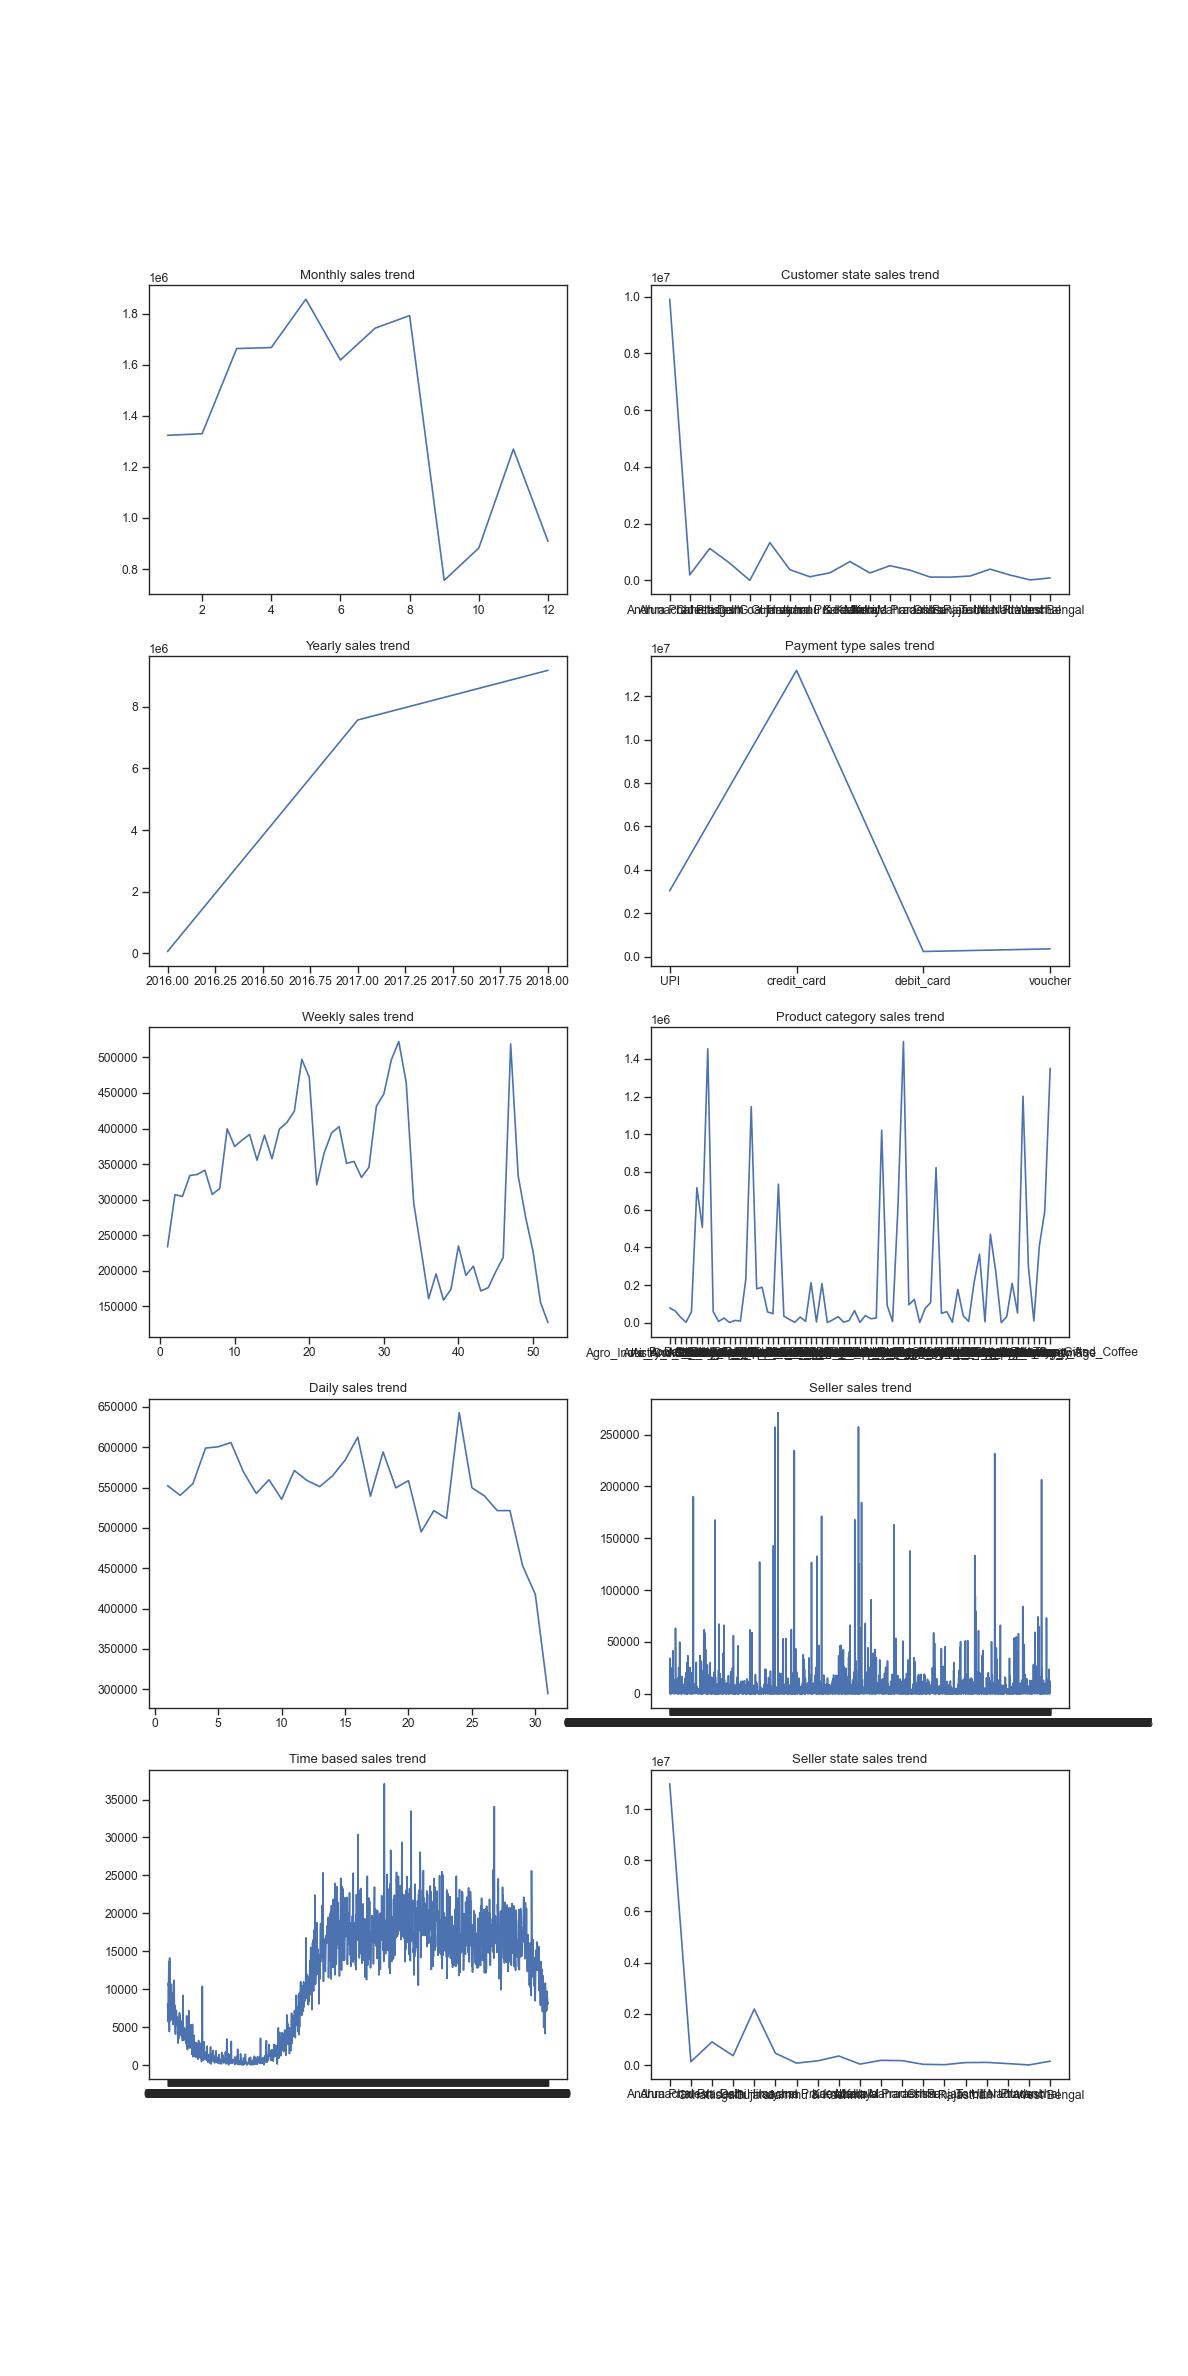

Text(0.5, 1.0, 'Seller state sales trend')

In [474]:
fig, axs = plt.subplots (5,2, figsize = (15, 30))
axs [0,0].plot(Month_sales_trend)
axs [0,0].set_title ('Monthly sales trend')
axs [1,0].plot(Year_sales_trend)
axs [1,0].set_title ('Yearly sales trend')
axs [2,0].plot(Week_sales_trend)
axs [2,0].set_title ('Weekly sales trend')
axs [3,0].plot(Days_sales_trend)
axs [3,0].set_title ('Daily sales trend')
axs [4,0].plot(Time_sales_trend)
axs [4,0].set_title ('Time based sales trend')
axs [0,1].plot(Cust_state_sales_trend)
axs [0,1].set_title ('Customer state sales trend')
axs [1,1].plot(Payment_type_sales_trend)
axs [1,1].set_title ('Payment type sales trend')
axs [2,1].plot(Product_cat_sales_trend)
axs [2,1].set_title ('Product category sales trend')
axs [3,1].plot(Seller_sales_trend)
axs [3,1].set_title ('Seller sales trend')
axs [4,1].plot(Seller_state_sales_trend)
axs [4,1].set_title ('Seller state sales trend')

# Understand the trends/seasonality of Quantity of Orders.

In [46]:
Month_quantity_trend = Plot_order_data.groupby('month')['order_id'].count()
Year_quantity_trend = Plot_order_data.groupby('year')['order_id'].count()
Week_quantity_trend = Plot_order_data.groupby('week')['order_id'].count()
Days_quantity_trend = Plot_order_data.groupby('day')['order_id'].count()
Time_quantity_trend = Plot_order_data.groupby('time')['order_id'].count()
Cust_state_quantity_trend = Plot_order_data.groupby('customer_state')['order_id'].count()
Payment_type_quantity_trend = Plot_order_data.groupby('payment_type')['order_id'].count()
Product_cat_quantity_trend = Plot_order_data.groupby('product_category_name')['order_id'].count()
Seller_quantity_trend = Plot_order_data.groupby('seller_id')['order_id'].count()
Seller_state_quantity_trend = Plot_order_data.groupby('seller_state')['order_id'].count()

**Understand the trends/seasonality of Quantity of Orders by Month.**

In [47]:
Month_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'blue')
plt.show()
plt.xlabel('Months')
plt.ylabel('Quantity of orders')
plt.title('Monthly trend of order quantity')

Text(0.5, 1.0, 'Monthly trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Year.**

In [48]:
Year_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'green')
plt.show()
plt.xlabel('Years')
plt.ylabel('Quantity of orders')
plt.title('Yearly trend of order quantity')

Text(0.5, 1.0, 'Yearly trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Week.**

In [49]:
Week_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'red')
plt.show()
plt.xlabel('Weeks')
plt.ylabel('Quantity of orders')
plt.title('Weekly trend of order quantity')

Text(0.5, 1.0, 'Weekly trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Days.**

In [50]:
Days_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'brown')
plt.show()
plt.xlabel('Days')
plt.ylabel('Quantity of orders')
plt.title('Daily trend of order quantity')

Text(0.5, 1.0, 'Daily trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Time.**

In [51]:
Time_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'orange')
plt.show()
plt.xlabel('Time')
plt.ylabel('Quantity of orders')
plt.title(' Time based trend of order quantity')

Text(0.5, 1.0, ' Time based trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Customer states.**

In [52]:
Cust_state_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'purple')
plt.show()
plt.xlabel('Customer location')
plt.ylabel('Quantity of orders')
plt.title('Customer location based trend of order quantity')

Text(0.5, 1.0, 'Customer location based trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Payment type.**

In [53]:
Payment_type_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'blue')
plt.show()
plt.xlabel('Payment type')
plt.ylabel('Quantity of orders')
plt.title('Payment type based trend of order quantity')

Text(0.5, 1.0, 'Payment type based trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by product Quantity.**

In [54]:
Product_cat_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'green')
plt.show()
plt.xlabel('Product category names')
plt.ylabel('Quantity of orders')
plt.title('Product category name trend of order quantity')

Text(0.5, 1.0, 'Product category name trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Seller quantity.**

In [55]:
Seller_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'maroon')
plt.show()
plt.xlabel('Seller ids')
plt.ylabel('Quantity of orders')
plt.title('Sellers based trend of order quantity')

Text(0.5, 1.0, 'Sellers based trend of order quantity')

**Understand the trends/seasonality of Quantity of Orders by Seller State quantity.**

In [56]:
Seller_state_quantity_trend.plot(kind ='line',figsize = (12,5), color = 'violet')
plt.show()
plt.xlabel('Seller states')
plt.ylabel('Quantity of orders')
plt.title('Seller state based trend of order quantity')

Text(0.5, 1.0, 'Seller state based trend of order quantity')

# Popular Product categories by month.

In [57]:
Plot_order_data

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_value,year,month,week,day,customer_city,customer_state,time,product_id,product_category_name,seller_id,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,credit_card,18.12,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,voucher,2.00,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,voucher,18.59,2017,10,40,2,Akkarampalle,Andhra Pradesh,10:56:00,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,UPI,141.46,2018,7,30,24,Pandariya,Chhattisgarh,20:41:00,595fac2a385ac33a80bd5114aec74eb8,Perfumery,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,credit_card,179.12,2018,8,32,8,Dhamdha,Chhattisgarh,08:38:00,aa4383b373c6aca5d8797843e5594415,Auto,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:00,credit_card,85.08,2017,3,10,9,Bobbili,Andhra Pradesh,09:54:00,ac35486adb7b02598c182c2ff2e05254,Health_Beauty,e24fc9fcd865784fb25705606fe3dfe7,Koratla,Andhra Pradesh
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,credit_card,195.00,2018,2,6,6,Mahendragarh,Haryana,12:58:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,1f9ab4708f3056ede07124aad39a2554,Mancherial,Andhra Pradesh
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,credit_card,271.01,2017,8,34,27,Bidasar,Rajasthan,14:46:00,b80910977a37536adeddd63663f916ad,Home_Appliances_2,d50d79cb34e38265a8649c383dcffd48,Akkarampalle,Andhra Pradesh
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,credit_card,441.16,2018,1,2,8,Banaur,Punjab,21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,a1043bafd471dff536d0c462352beb48,Dalurband,West Bengal


In [58]:
Popular_products = pd.DataFrame(Plot_order_data.groupby(['month','product_category_name'])['order_id'].count().reset_index())
Popular_products = Popular_products.sort_values(['month','order_id'],ascending=[True,False]).groupby('product_category_name').head()
Popular_products = Popular_products.rename(columns = {'order_id': 'order_quantity'})
Popular_products = Popular_products.reset_index()
Popular_products = Popular_products.drop(columns = 'index')
Popular_products

,month,product_category_name,order_quantity
0,1,Bed_Bath_Table,873
1,1,Sports_Leisure,685
2,1,Furniture_Decor,681
3,1,Health_Beauty,681
4,1,Computers_Accessories,665
...,...,...,...
346,8,Fashion_Childrens_Clothes,1
347,9,Fashion_Childrens_Clothes,1
348,9,Security_And_Services,1
349,10,Cds_Dvds_Musicals,1


<IPython.core.display.Javascript object>


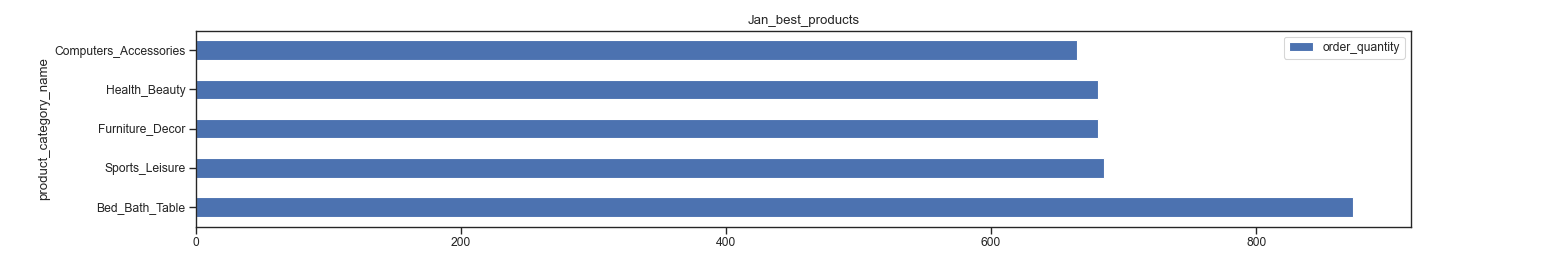

<IPython.core.display.Javascript object>


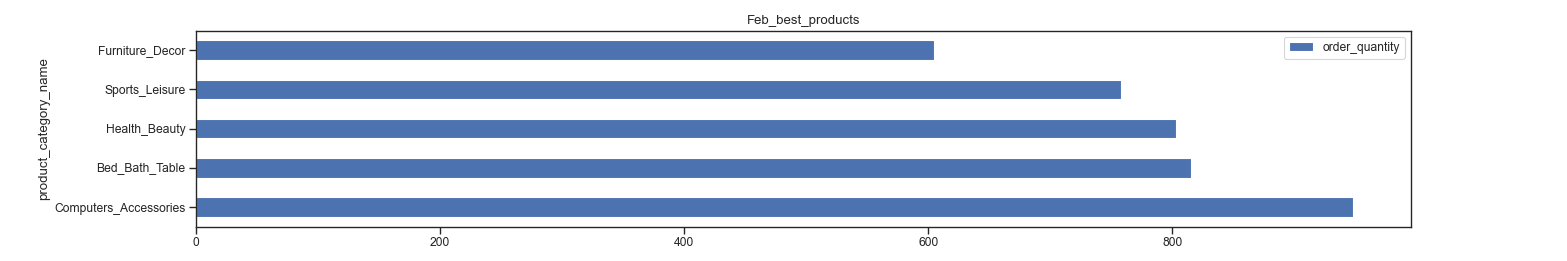

<IPython.core.display.Javascript object>


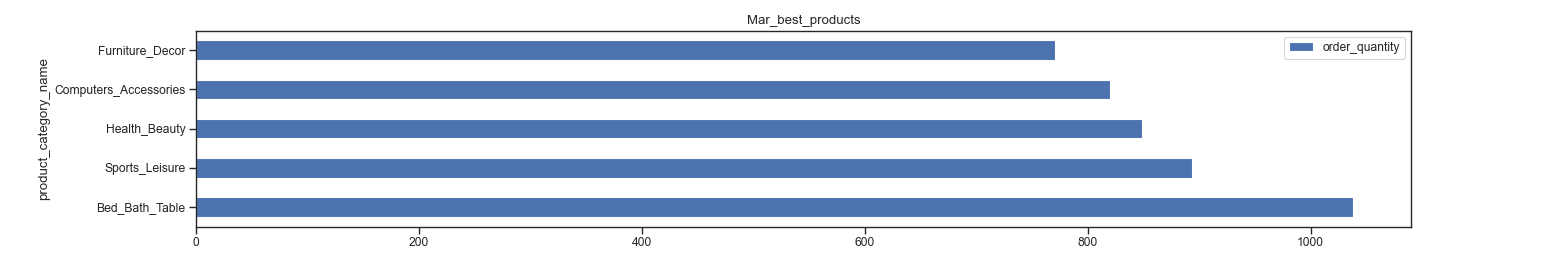

<IPython.core.display.Javascript object>


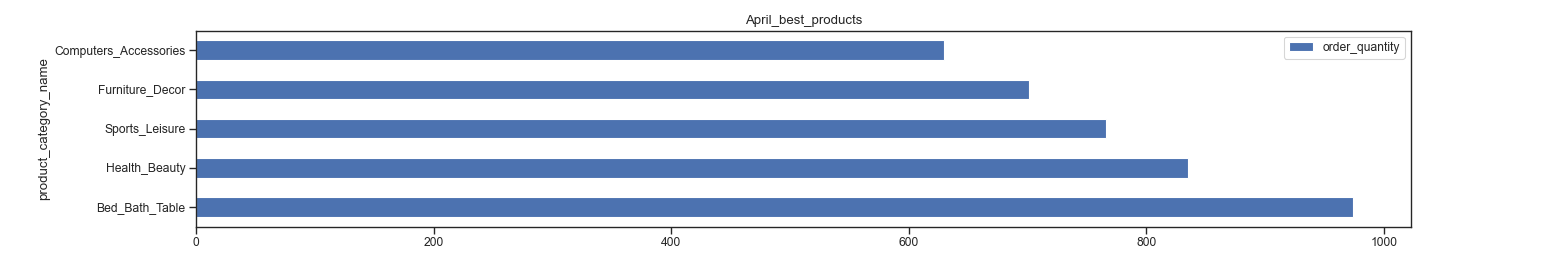

<IPython.core.display.Javascript object>


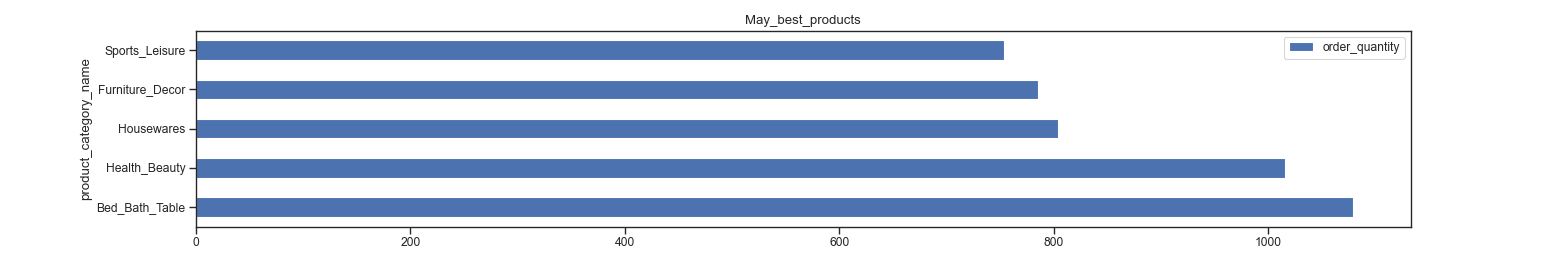

<IPython.core.display.Javascript object>


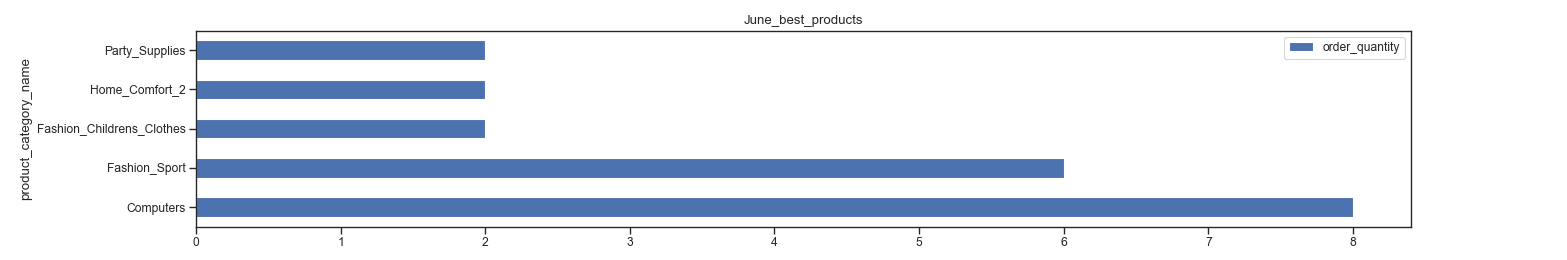

<IPython.core.display.Javascript object>


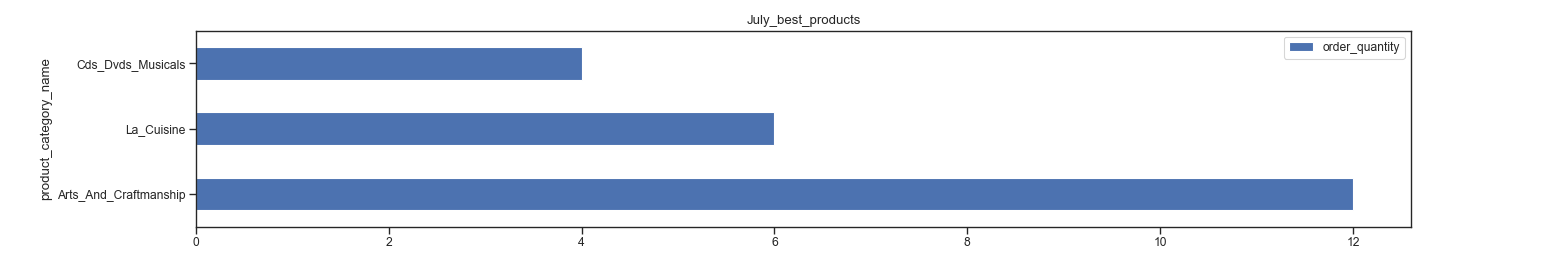

<IPython.core.display.Javascript object>


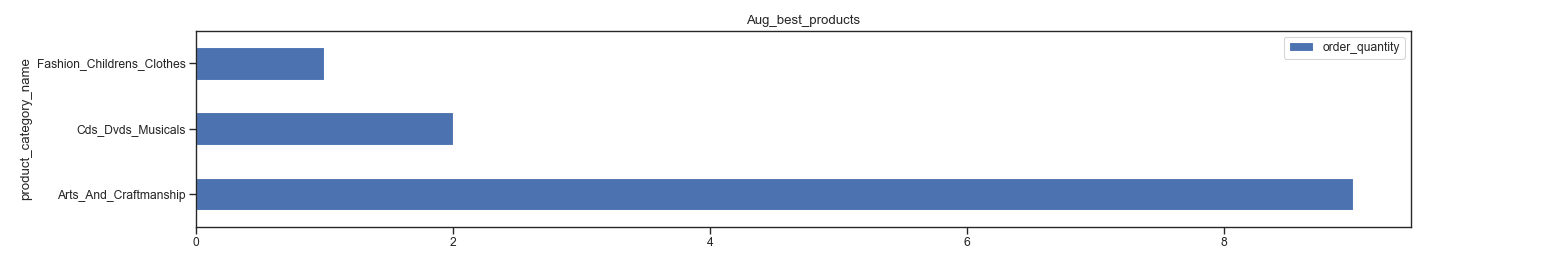

<IPython.core.display.Javascript object>


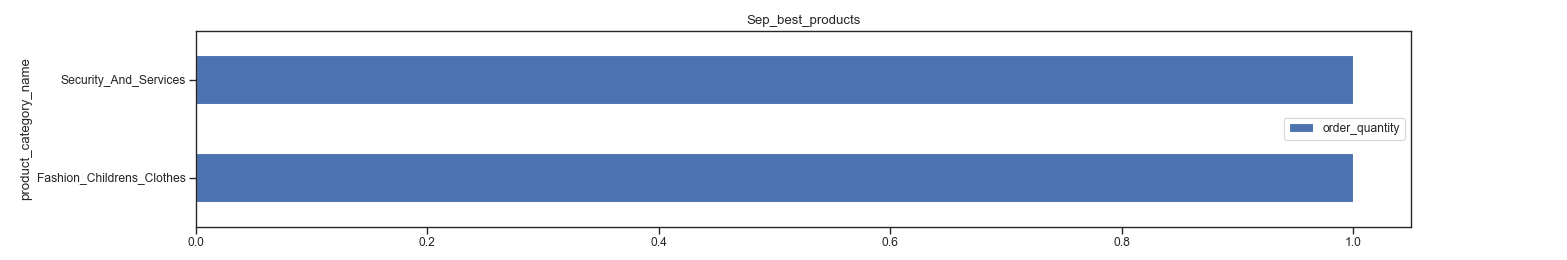

<IPython.core.display.Javascript object>


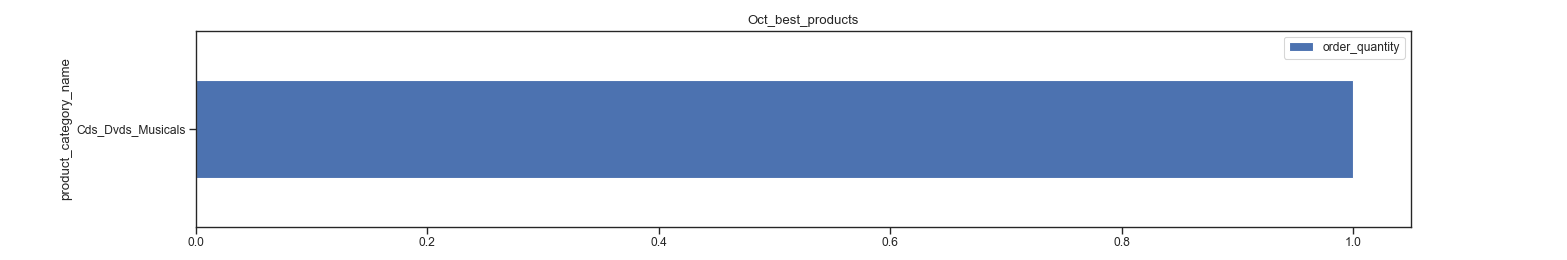

<IPython.core.display.Javascript object>


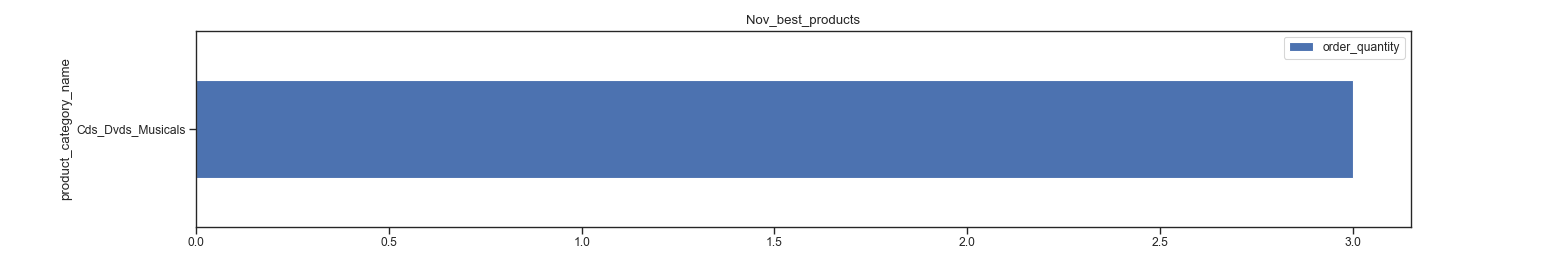

<AxesSubplot:title={'center':'Nov_best_products'}, ylabel='product_category_name'>

In [59]:
Jan_best_products = Popular_products[Popular_products.month == 1].head()
Feb_best_products = Popular_products[Popular_products.month == 2].head()
Mar_best_products = Popular_products[Popular_products.month == 3].head()
April_best_products = Popular_products[Popular_products.month == 4].head()
May_best_products = Popular_products[Popular_products.month == 5].head()
June_best_products = Popular_products[Popular_products.month == 6].head()
July_best_products = Popular_products[Popular_products.month == 7].head()
Aug_best_products = Popular_products[Popular_products.month == 8].head()
Sep_best_products = Popular_products[Popular_products.month == 9].head()
Oct_best_products = Popular_products[Popular_products.month == 10].head()
Nov_best_products = Popular_products[Popular_products.month == 11].head()
Jan_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Jan_best_products' ) 
Feb_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Feb_best_products')
Mar_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Mar_best_products')
April_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'April_best_products')
May_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'May_best_products')
June_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'June_best_products')
July_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'July_best_products')
Aug_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Aug_best_products')
Sep_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Sep_best_products')
Oct_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Oct_best_products')
Nov_best_products.plot(x = 'product_category_name', y = 'order_quantity', kind = 'barh', figsize = (18,3),title = 'Nov_best_products')


# Popular Product categories by Seller States.

In [60]:
Seller_best_products = Plot_order_data[['order_id','product_category_name','seller_state']]
Seller_best_products_data = pd.DataFrame(Seller_best_products.groupby(['seller_state','product_category_name'])['order_id'].count().reset_index())

In [61]:
Seller_best_products_data = Seller_best_products_data.sort_values(['seller_state','order_id'], ascending = False).groupby('product_category_name').head()
Seller_best_products_data

,seller_state,product_category_name,order_id
585,West Bengal,Garden_Tools,418
581,West Bengal,Computers_Accessories,335
586,West Bengal,Health_Beauty,45
579,West Bengal,Baby,28
583,West Bengal,Food_Drink,12
...,...,...,...
3,Andhra Pradesh,Arts_And_Craftmanship,17
34,Andhra Pradesh,Flowers,9
28,Andhra Pradesh,Fashion_Childrens_Clothes,8
45,Andhra Pradesh,Home_Comfort_2,1


In [62]:
Seller_best_products_data = Seller_best_products_data.reset_index()
Seller_best_products_data = Seller_best_products_data.drop(columns = 'index')
Seller_best_products_data 

,seller_state,product_category_name,order_id
0,West Bengal,Garden_Tools,418
1,West Bengal,Computers_Accessories,335
2,West Bengal,Health_Beauty,45
3,West Bengal,Baby,28
4,West Bengal,Food_Drink,12
...,...,...,...
302,Andhra Pradesh,Arts_And_Craftmanship,17
303,Andhra Pradesh,Flowers,9
304,Andhra Pradesh,Fashion_Childrens_Clothes,8
305,Andhra Pradesh,Home_Comfort_2,1


          seller_state    product_category_name  order_id
0          West Bengal             Garden_Tools       418
1          West Bengal    Computers_Accessories       335
2          West Bengal            Health_Beauty        45
3          West Bengal                     Baby        28
17         Uttaranchal            Health_Beauty        31
..                 ...                      ...       ...
284  Arunachal Pradesh   Signaling_And_Security         1
285     Andhra Pradesh          Books_Technical       214
286     Andhra Pradesh             Home_Confort       163
287     Andhra Pradesh            Fashion_Shoes       158
288     Andhra Pradesh  Fashion_Underwear_Beach       104

[72 rows x 3 columns]


<IPython.core.display.Javascript object>


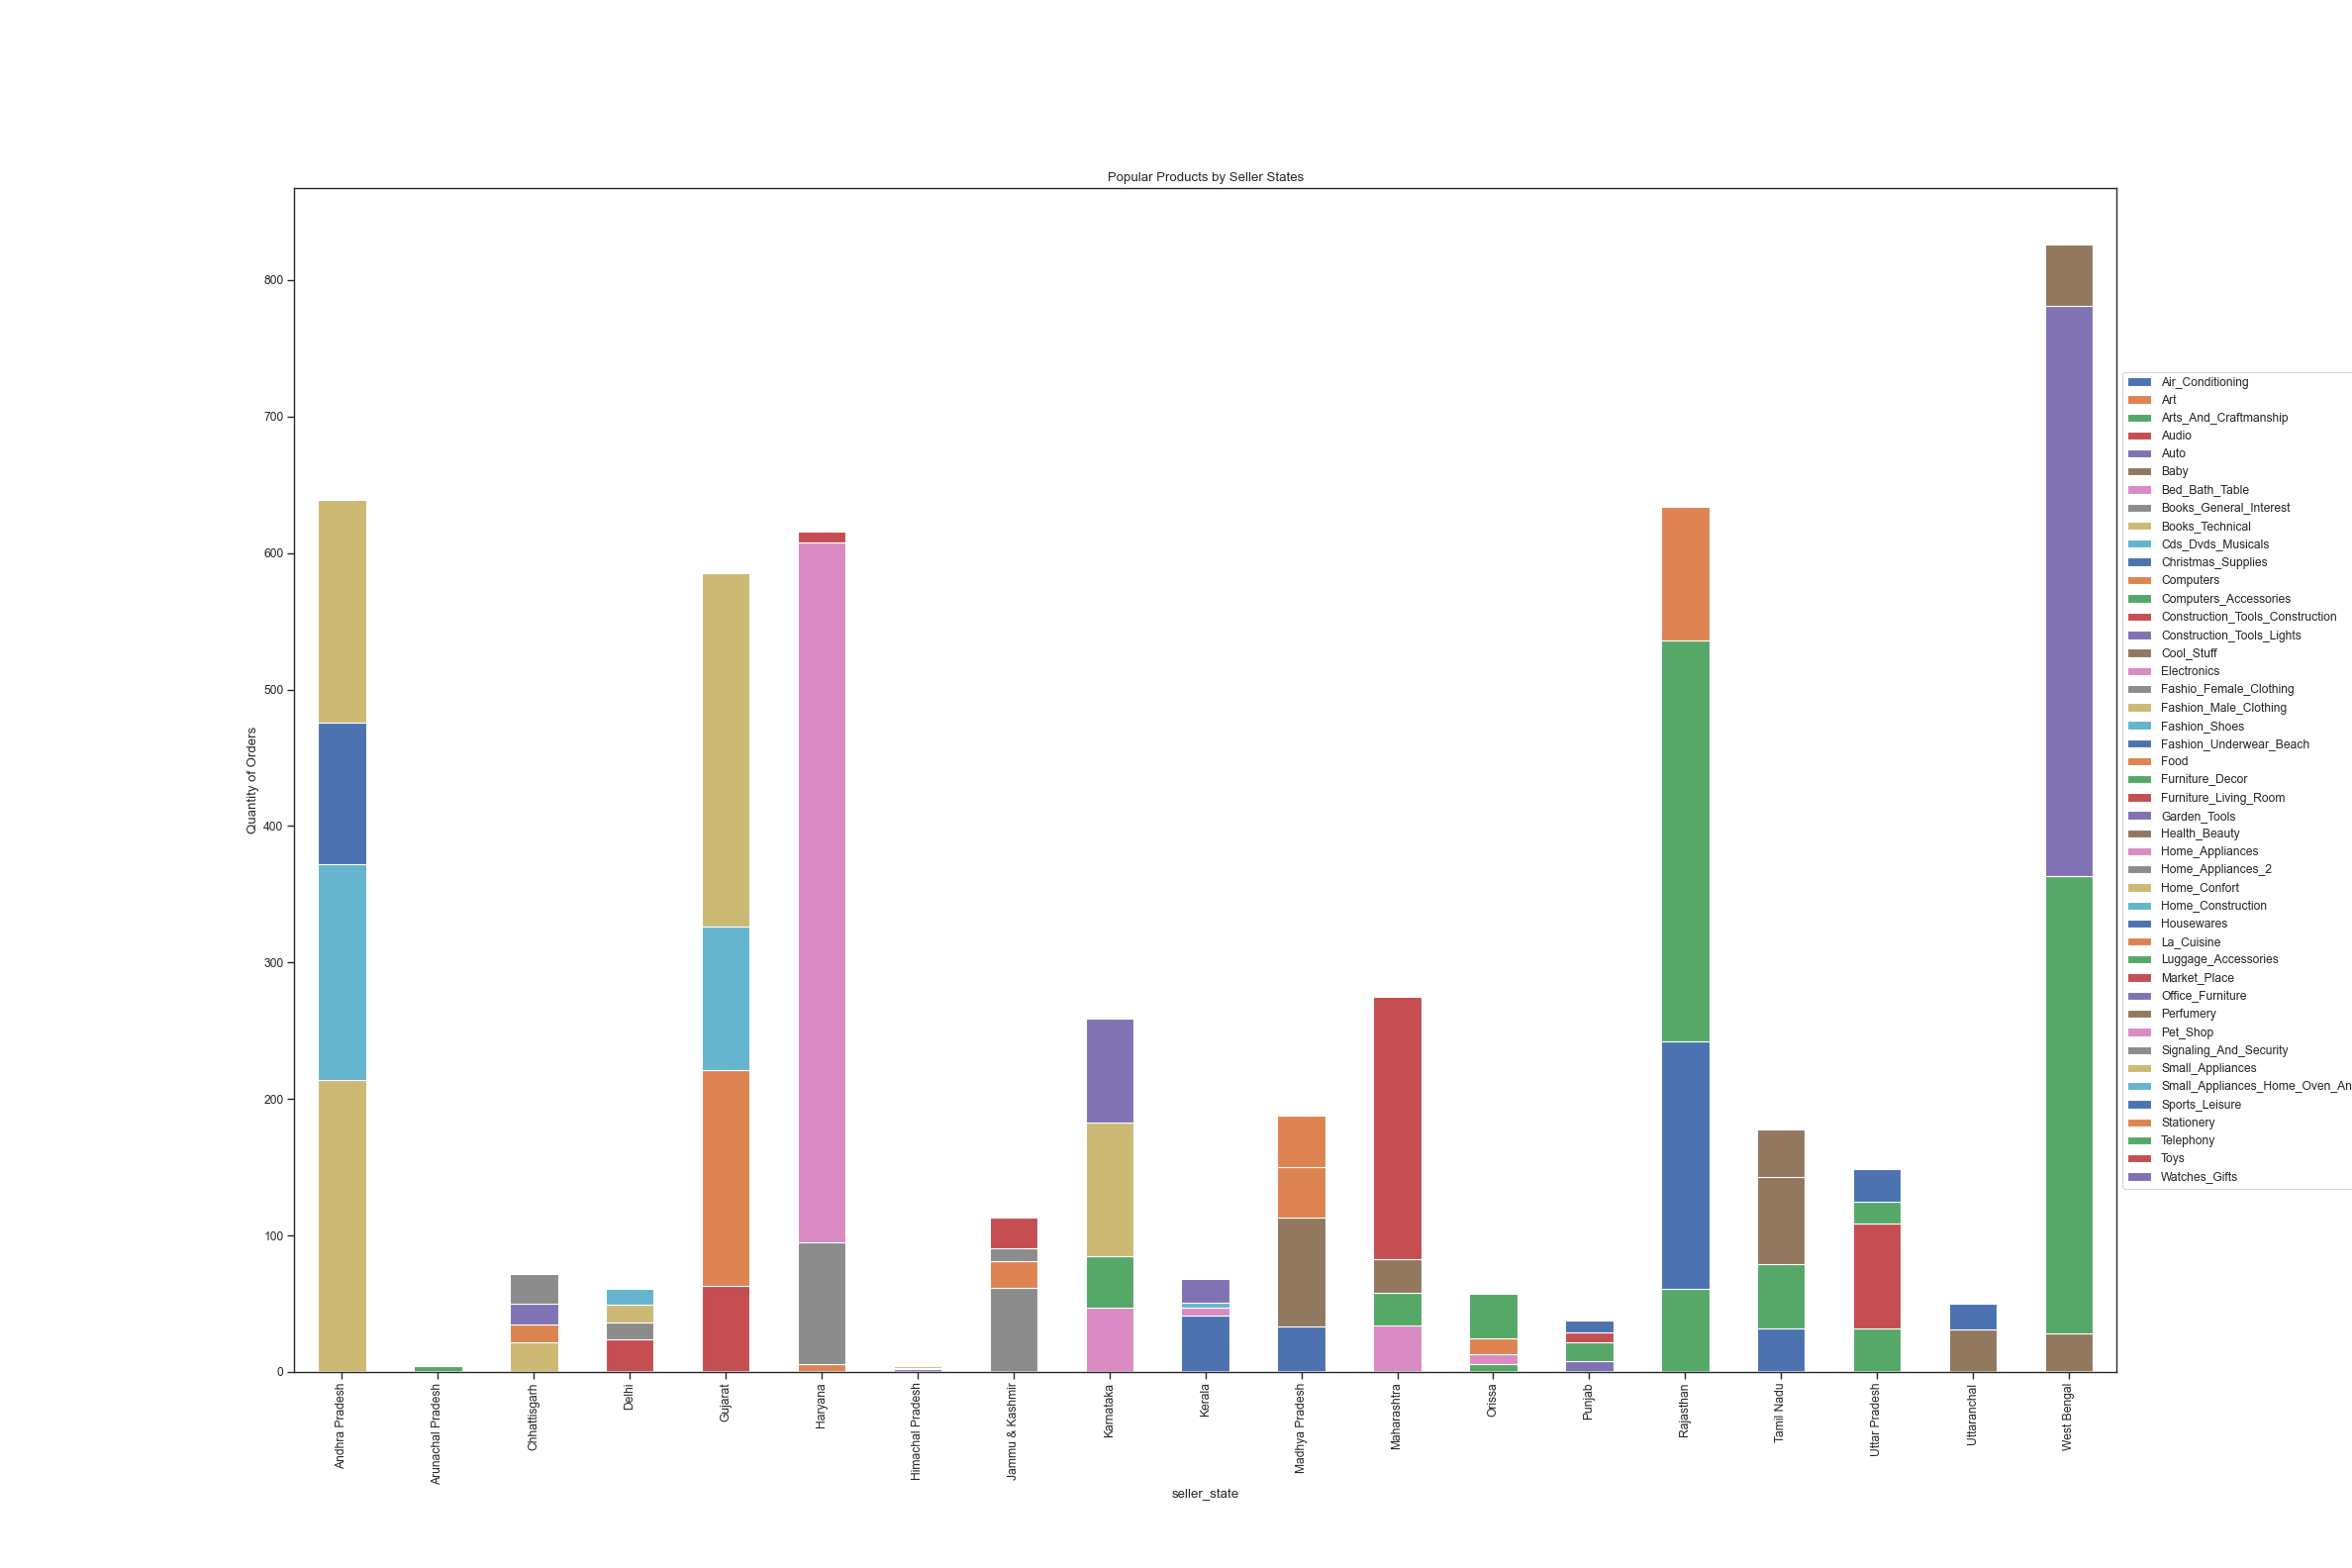

Text(0.5, 1.0, 'Popular Products by Seller States')

In [63]:
Seller_best_products_data = Seller_best_products_data.sort_values(['seller_state','order_id'], ascending = False).groupby('seller_state').head(4)
print(Seller_best_products_data)
s = Seller_best_products_data.pivot_table(index = 'seller_state', columns = 'product_category_name', values = 'order_id')
s.plot(kind = 'bar', figsize = (30,20),stacked = True ,legend = True, ylabel = 'Quantity of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Popular Products by Seller States')

# Popular Product categories by Customer States.

In [64]:
Customer_best_products = Plot_order_data[['order_id','product_category_name','customer_state']]
Customer_best_products_data = pd.DataFrame(Customer_best_products.groupby(['customer_state','product_category_name'])['order_id'].count().reset_index())
Customer_best_products_data = Customer_best_products_data.sort_values(['customer_state','order_id'], ascending = False).groupby('product_category_name').head()
Customer_best_products_data = Customer_best_products_data.reset_index()
Customer_best_products_data = Customer_best_products_data.drop(columns = 'index')
Customer_best_products_data 

,customer_state,product_category_name,order_id
0,West Bengal,Health_Beauty,42
1,West Bengal,Telephony,33
2,West Bengal,Bed_Bath_Table,31
3,West Bengal,Computers_Accessories,30
4,West Bengal,Sports_Leisure,24
...,...,...,...
342,Chhattisgarh,Fashion_Childrens_Clothes,1
343,Andhra Pradesh,Cds_Dvds_Musicals,10
344,Andhra Pradesh,La_Cuisine,10
345,Andhra Pradesh,Fashion_Childrens_Clothes,6


     customer_state      product_category_name  order_id
0       West Bengal              Health_Beauty        42
1       West Bengal                  Telephony        33
2       West Bengal             Bed_Bath_Table        31
3       West Bengal      Computers_Accessories        30
42      Uttaranchal                 Cool_Stuff        12
..              ...                        ...       ...
341    Chhattisgarh        Diapers_And_Hygiene         1
343  Andhra Pradesh          Cds_Dvds_Musicals        10
344  Andhra Pradesh                 La_Cuisine        10
345  Andhra Pradesh  Fashion_Childrens_Clothes         6
346  Andhra Pradesh      Security_And_Services         1

[65 rows x 3 columns]


<IPython.core.display.Javascript object>


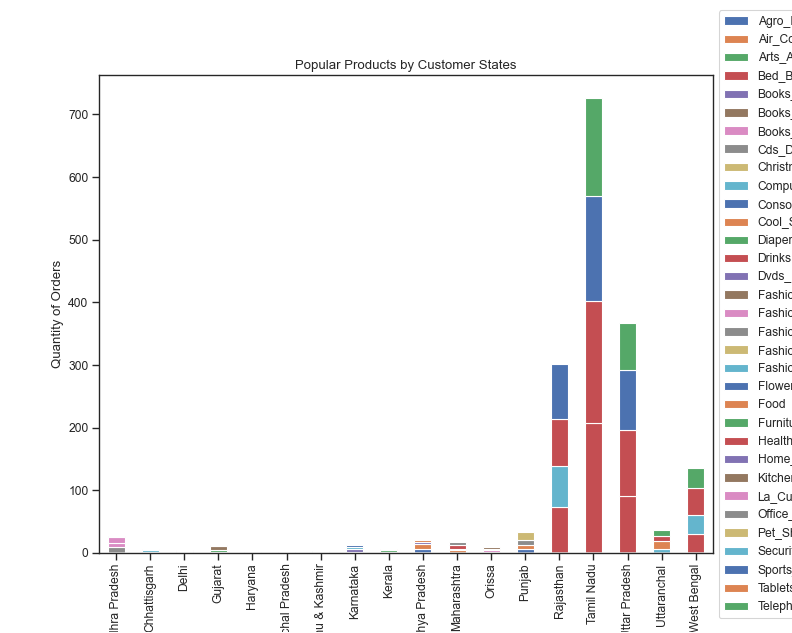

Text(0.5, 1.0, 'Popular Products by Customer States')

In [65]:
Customer_best_products_data = Customer_best_products_data.sort_values(['customer_state','order_id'], ascending = False).groupby('customer_state').head(4)
print(Customer_best_products_data)
k = Customer_best_products_data.pivot_table(index = 'customer_state', columns = 'product_category_name', values = 'order_id')
k.plot(kind = 'bar', figsize = (10,8),stacked = True ,legend = True, ylabel = 'Quantity of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Popular Products by Customer States')

# Popular Product categories. 

        product_category_name  order_id
0              Bed_Bath_Table     10730
1               Health_Beauty      9251
2              Sports_Leisure      8095
3       Computers_Accessories      7106
4             Furniture_Decor      7095
..                        ...       ...
66      Arts_And_Craftmanship        24
67                 La_Cuisine        15
68          Cds_Dvds_Musicals        12
69  Fashion_Childrens_Clothes         8
70      Security_And_Services         2

[71 rows x 2 columns]


<IPython.core.display.Javascript object>


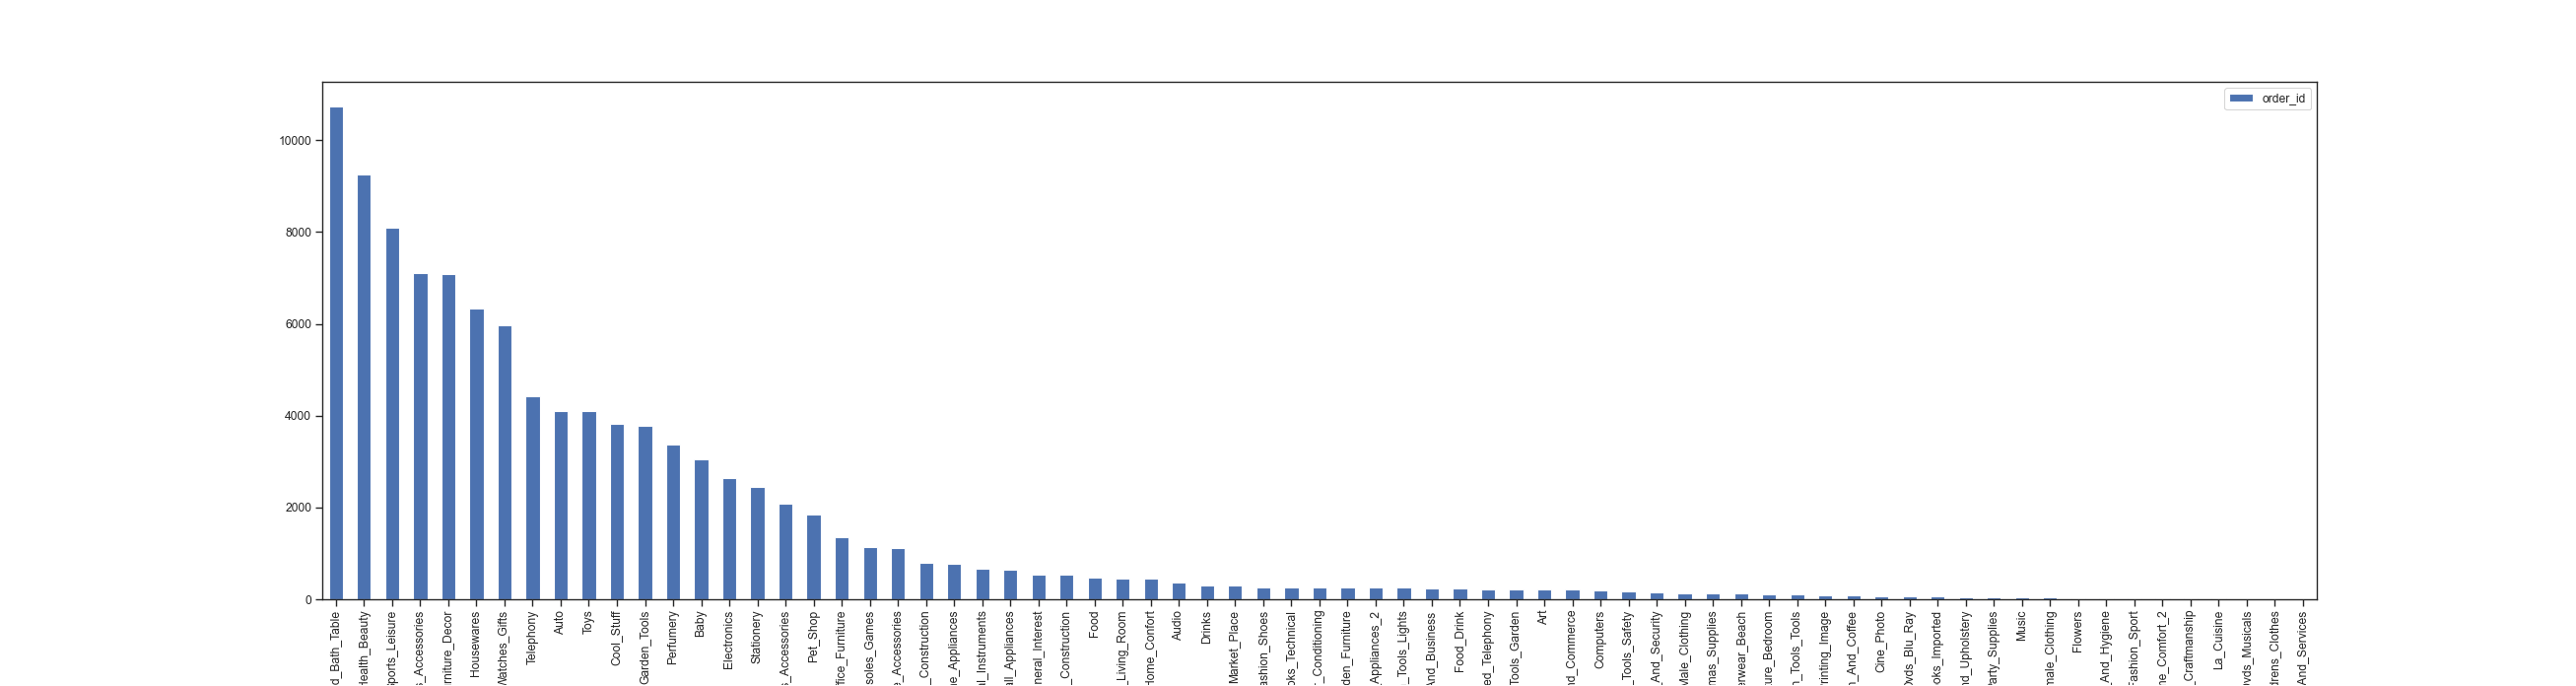

<AxesSubplot:xlabel='product_category_name'>

In [66]:
Category_best_products = Plot_order_data[['order_id','product_category_name']]
Category_best_products_data = pd.DataFrame(Category_best_products.groupby(['product_category_name'])['order_id'].count().reset_index())
Category_best_products_data = Category_best_products_data.sort_values('order_id', ascending = False).groupby('product_category_name').head()
Category_best_products_data = Category_best_products_data.reset_index()
Category_best_products_data = Category_best_products_data.drop(columns = 'index')
print(Category_best_products_data)
Category_best_products_data.plot(x = 'product_category_name',y = 'order_id',kind = 'bar',figsize = (30,8))

# Products Bought by Customer States.

       customer_state  product_id
0      Andhra Pradesh       65115
1             Gujarat        7976
2        Chhattisgarh        6731
3           Karnataka        4139
4               Delhi        3560
5      Madhya Pradesh        3048
6             Haryana        2376
7          Tamil Nadu        2262
8         Maharashtra        2143
9     Jammu & Kashmir        1649
10             Kerala        1609
11  Arunachal Pradesh        1186
12      Uttar Pradesh        1085
13          Rajasthan         849
14   Himachal Pradesh         782
15             Punjab         715
16             Orissa         655
17        West Bengal         393
18        Uttaranchal         103
19                Goa          10


<IPython.core.display.Javascript object>


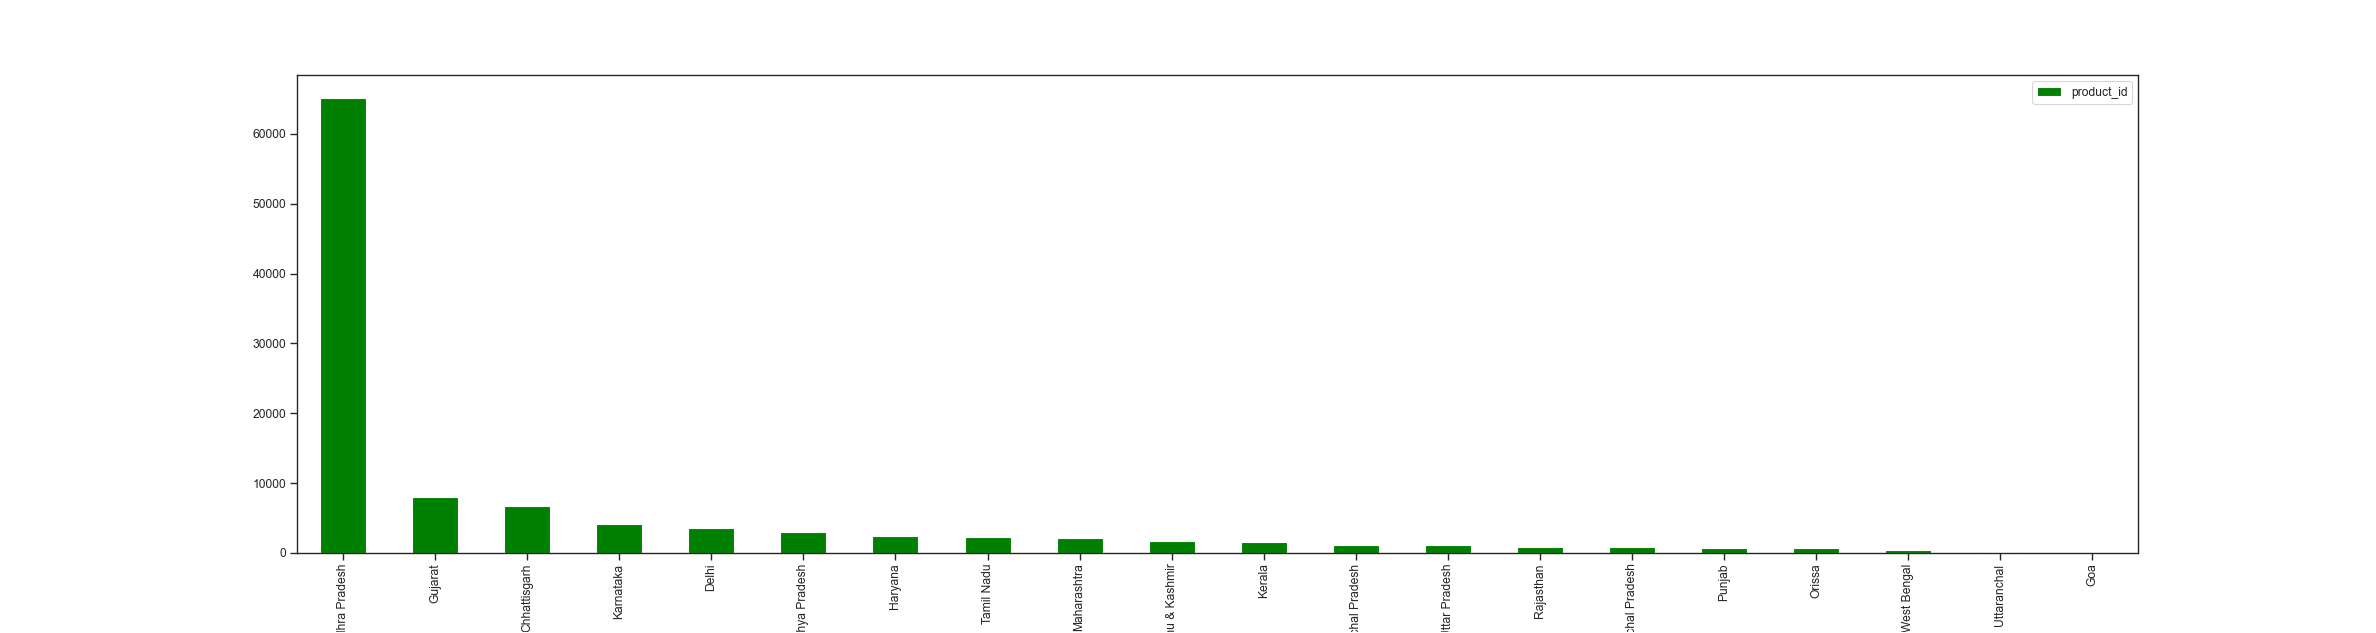

<AxesSubplot:xlabel='customer_state'>

In [454]:
States_best_products = Plot_order_data[['product_id','customer_state']]
States_best_products_data = pd.DataFrame(States_best_products.groupby(['customer_state'])['product_id'].count().reset_index())
States_best_products_data = States_best_products_data.sort_values('product_id', ascending = False).groupby('customer_state').head()
States_best_products_data = States_best_products_data.reset_index()
States_best_products_data = States_best_products_data.drop(columns = 'index')
print(States_best_products_data)
States_best_products_data.plot(x = 'customer_state',y = 'product_id',kind = 'bar',figsize = (30,8), color = 'green')

# Products sold by Seller States. 

         seller_state  product_id
0      Andhra Pradesh       71675
1             Gujarat       13879
2        Chhattisgarh        5061
3             Haryana        3056
4           Karnataka        2287
5               Delhi        2241
6     Jammu & Kashmir        1177
7      Madhya Pradesh        1008
8         West Bengal         888
9   Arunachal Pradesh         756
10          Rajasthan         750
11        Maharashtra         606
12         Tamil Nadu         445
13   Himachal Pradesh         387
14             Kerala         238
15      Uttar Pradesh         179
16             Orissa         160
17             Punjab          73
18        Uttaranchal          50


<IPython.core.display.Javascript object>


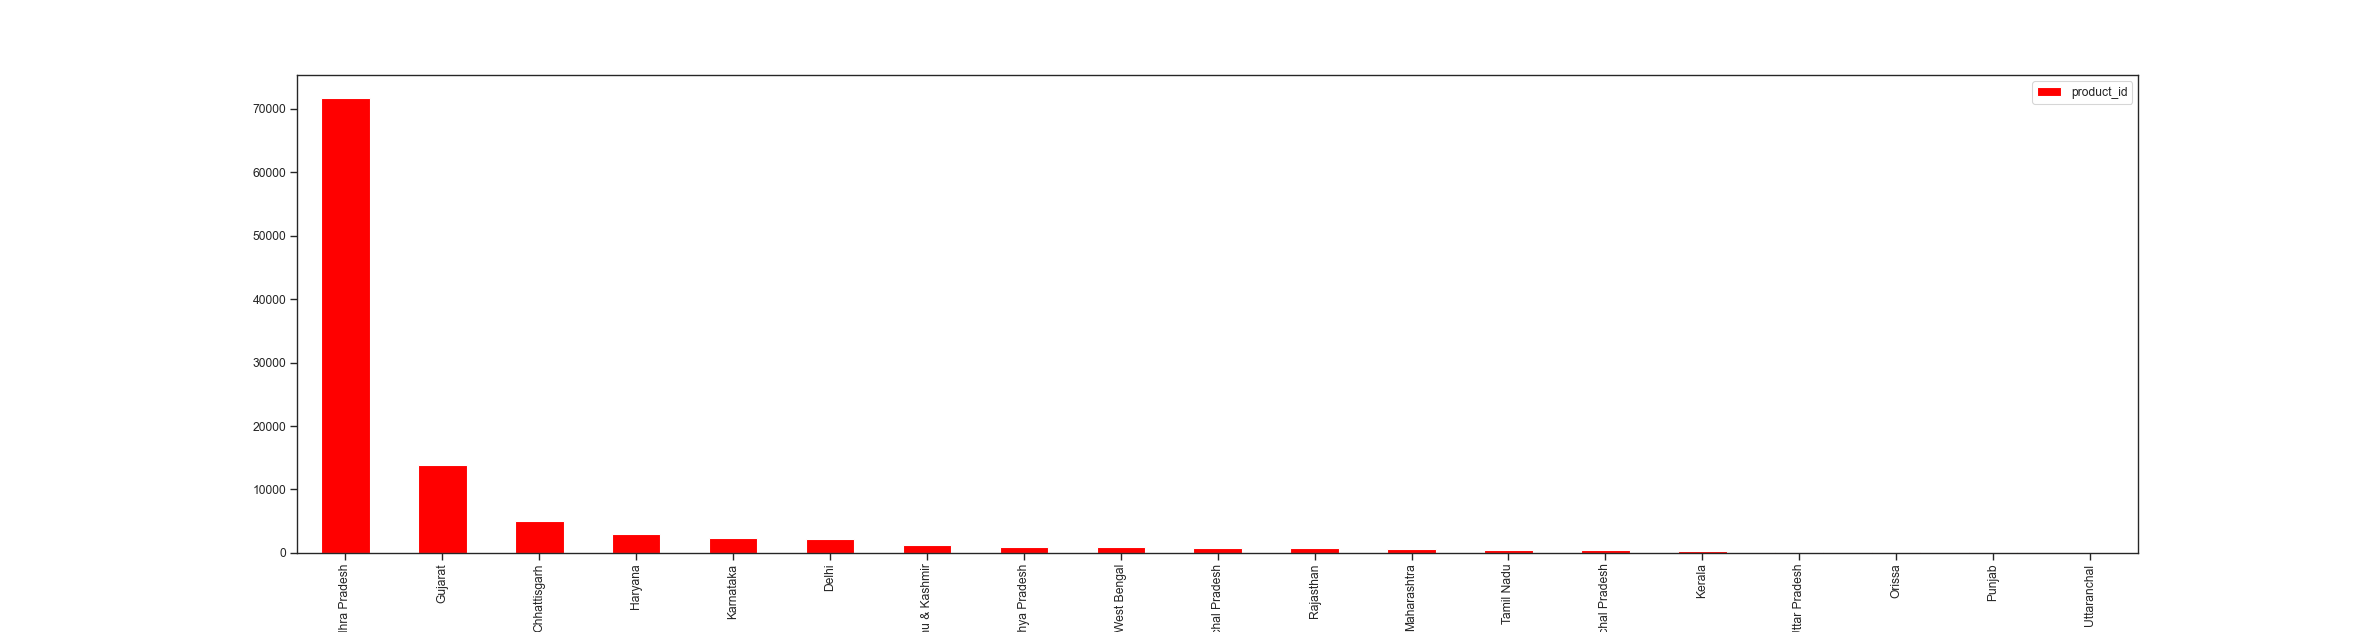

<AxesSubplot:xlabel='seller_state'>

In [380]:
Seller_States_best_products = Plot_order_data[['product_id','seller_state']]
Seller_States_best_products_data = pd.DataFrame(Seller_States_best_products.groupby(['seller_state'])['product_id'].count().reset_index())
Seller_States_best_products_data = Seller_States_best_products_data.sort_values('product_id', ascending = False).groupby('seller_state').head()
Seller_States_best_products_data = Seller_States_best_products_data.reset_index()
Seller_States_best_products_data = Seller_States_best_products_data.drop(columns = 'index')
print(Seller_States_best_products_data)
Seller_States_best_products_data.plot(x = 'seller_state',y = 'product_id',kind = 'bar',figsize = (30,8),color = 'red')

# Top ten expensive products.

<IPython.core.display.Javascript object>


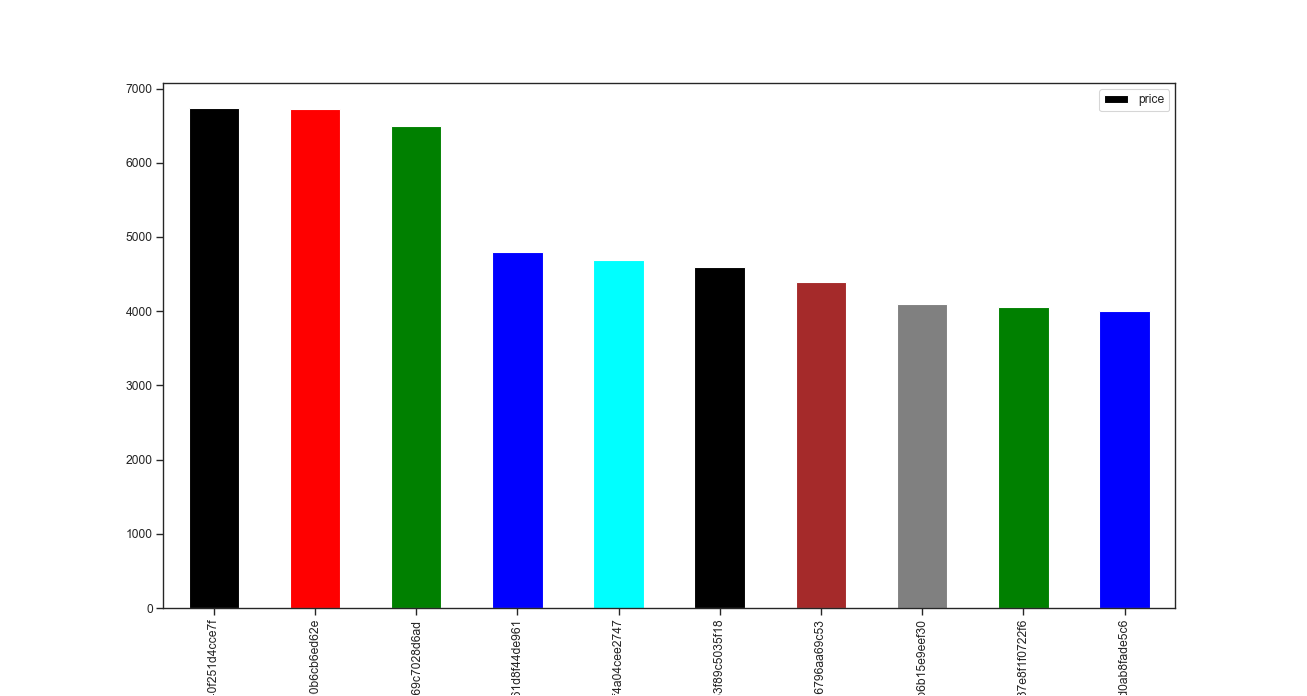

TypeError: 'str' object is not callable

In [353]:
Revised = Order_merge[['product_id','price']]
Revised_data = Revised.sort_values(by = 'price', ascending = False).head(10).reset_index()
Revised_data = Revised_data.drop(columns = 'index')
Revised_data.plot(x = 'product_id', y = 'price',kind = 'bar', figsize = (15,8),color=['black', 'red', 'green', 'blue', 'cyan','black','brown','grey','green','blue'])
plt.title('Ten most expensive products')

# Divide the customers into groups based on the revenue generated.

In [71]:
Cust_revenue = pd.DataFrame(Order_data[['customer_id','payment_value']])
Cust_revenue_data = pd.DataFrame(Cust_revenue.groupby('customer_id')['payment_value'].sum().sort_values(ascending = False).reset_index())
Cust_revenue_data

,customer_id,payment_value
0,1617b1357756262bfa56ab541c47bc16,109312.64
1,bd5d39761aa56689a265d95d8d32b8be,45256.00
2,be1b70680b9f9694d8c70f41fa3dc92b,44048.00
3,05455dfa7cd02f13d132aa7a6a9729c6,36489.24
4,1ff773612ab8934db89fd5afa8afe506,30186.00
...,...,...
98660,d2c63ad286e3ca9dd69218008d61ff81,11.62
98661,046f890135acc703faff4c1fc0c2d73c,11.56
98662,8e4bd65db637116b6b68109e4df21b84,10.89
98663,184e8e8e48937145eb96c721ef1f0747,10.07


In [111]:
Cust_revenue_data['Group_segment_1000'] = pd.cut(Cust_revenue_data.payment_value,range(1,110000,1000))

In [115]:
Cust_revenue_data 

,customer_id,payment_value,Group_segment_1000
0,1617b1357756262bfa56ab541c47bc16,109312.64,NaN
1,bd5d39761aa56689a265d95d8d32b8be,45256.00,"(45001.0, 46001.0]"
2,be1b70680b9f9694d8c70f41fa3dc92b,44048.00,"(44001.0, 45001.0]"
3,05455dfa7cd02f13d132aa7a6a9729c6,36489.24,"(36001.0, 37001.0]"
4,1ff773612ab8934db89fd5afa8afe506,30186.00,"(30001.0, 31001.0]"
...,...,...,...
98660,d2c63ad286e3ca9dd69218008d61ff81,11.62,"(1.0, 1001.0]"
98661,046f890135acc703faff4c1fc0c2d73c,11.56,"(1.0, 1001.0]"
98662,8e4bd65db637116b6b68109e4df21b84,10.89,"(1.0, 1001.0]"
98663,184e8e8e48937145eb96c721ef1f0747,10.07,"(1.0, 1001.0]"


In [118]:
f_thousand = pd.DataFrame(Cust_revenue_data.groupby('Group_segment_1000')['customer_id'].count())
f_thousand = f_thousand.reset_index()

In [119]:
f_thousand

,Group_segment_1000,customer_id
0,"(1, 1001]",96346
1,"(1001, 2001]",1628
2,"(2001, 3001]",362
3,"(3001, 4001]",140
4,"(4001, 5001]",62
...,...,...
104,"(104001, 105001]",0
105,"(105001, 106001]",0
106,"(106001, 107001]",0
107,"(107001, 108001]",0


    Group_segment_1000  customer_id
0            (1, 1001]        96346
1         (1001, 2001]         1628
2         (2001, 3001]          362
3         (3001, 4001]          140
4         (4001, 5001]           62
..                 ...          ...
104   (104001, 105001]            0
105   (105001, 106001]            0
106   (106001, 107001]            0
107   (107001, 108001]            0
108   (108001, 109001]            0

[109 rows x 2 columns]


<IPython.core.display.Javascript object>


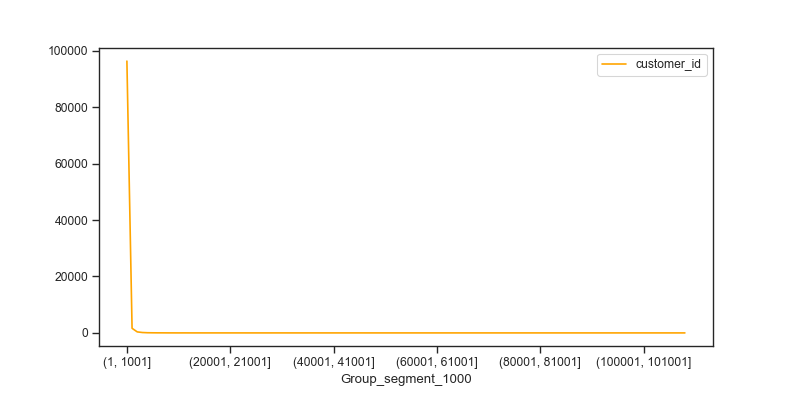

<AxesSubplot:xlabel='Group_segment_1000'>

In [129]:
print(f_thousand)
f_thousand.plot(x = 'Group_segment_1000',y = 'customer_id', figsize = (10, 5), color = 'orange')

# Divide the sellers into groups based on the revenue generated.

In [130]:
Seller_revenue = pd.DataFrame(Order_data[['seller_id','payment_value']])
Seller_revenue_data = pd.DataFrame(Seller_revenue.groupby('seller_id')['payment_value'].sum().sort_values(ascending = False).reset_index())
Seller_revenue_data

,seller_id,payment_value
0,7c67e1448b00f6e969d365cea6b010ab,507166.91
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04
2,4a3ca9315b744ce9f8e9374361493884,301245.27
3,1f50f920176fa81dab994f9023523100,290253.42
4,53243585a1d6dc2643021fd1853d8905,284903.08
...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21
3091,702835e4b785b67a084280efca355756,18.56
3092,4965a7002cca77301c82d3f91b82e1a9,16.36
3093,77128dec4bec4878c37ab7d6169d6f26,15.22


In [131]:
Seller_revenue_data['Group_segment_1000'] = pd.cut(Seller_revenue_data.payment_value,range(1,110000,1000))
Seller_revenue_data 

,seller_id,payment_value,Group_segment_1000
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,NaN
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,NaN
2,4a3ca9315b744ce9f8e9374361493884,301245.27,NaN
3,1f50f920176fa81dab994f9023523100,290253.42,NaN
4,53243585a1d6dc2643021fd1853d8905,284903.08,NaN
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,"(1.0, 1001.0]"
3091,702835e4b785b67a084280efca355756,18.56,"(1.0, 1001.0]"
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,"(1.0, 1001.0]"
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,"(1.0, 1001.0]"


In [142]:
s_thousand = pd.DataFrame(Seller_revenue_data.groupby('Group_segment_1000')['seller_id'].count())
s_thousand = s_thousand.reset_index()
s_thousand

,Group_segment_1000,seller_id
0,"(1, 1001]",1403
1,"(1001, 2001]",442
2,"(2001, 3001]",215
3,"(3001, 4001]",142
4,"(4001, 5001]",131
...,...,...
104,"(104001, 105001]",0
105,"(105001, 106001]",0
106,"(106001, 107001]",0
107,"(107001, 108001]",1


    Group_segment_1000  seller_id
0            (1, 1001]       1403
1         (1001, 2001]        442
2         (2001, 3001]        215
3         (3001, 4001]        142
4         (4001, 5001]        131
..                 ...        ...
104   (104001, 105001]          0
105   (105001, 106001]          0
106   (106001, 107001]          0
107   (107001, 108001]          1
108   (108001, 109001]          0

[109 rows x 2 columns]


<IPython.core.display.Javascript object>


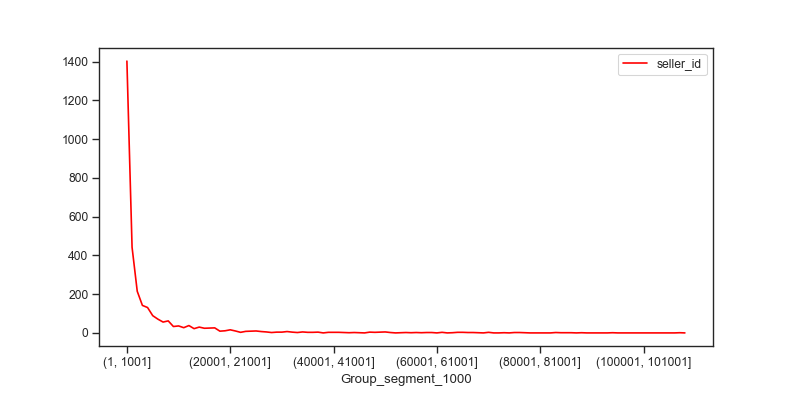

<AxesSubplot:xlabel='Group_segment_1000'>

In [147]:
print(s_thousand)
s_thousand.plot(x = 'Group_segment_1000',y = 'seller_id', figsize = (10, 5), color = 'red') 

# Top 10 Cross-selling products sold in a combination of each other.

In [305]:
New_data = Order_data[['customer_id','order_purchase_timestamp','product_id','product_category_name']]
Testing_data = pd.DataFrame(New_data.groupby(['order_purchase_timestamp','customer_id'])['product_id'].nunique().sort_values(ascending = False).head(15))
Testing_data = Testing_data.reset_index()
Testing_data

,order_purchase_timestamp,customer_id,product_id
0,2018-08-12 02:11:00,0d861a5e4dd6a9079d89e1330848f0ab,8
1,2018-05-12 22:27:00,a67a246af6ba598a14cc86df3c0354ee,7
2,2017-11-21 17:23:00,30bb84b541c96af98ba7d90b9ebf35d0,7
3,2018-08-16 04:29:00,1205480caca6c37f55954da838933b8a,7
4,2018-08-24 13:04:00,e898b5ef24833b9cb9e2d4f00b937595,6
5,2017-10-17 13:06:00,be1c4e52bb71e0c54b11a26b8e8d59f2,6
6,2018-07-08 16:13:00,6c44a903274653cddb1df3bcb05ac71f,6
7,2018-03-25 15:56:00,c9b6ccc9f42e3ac60bb09a0f53a09973,6
8,2017-01-15 23:25:00,8c4bcd3c3737198f62421c18e0348554,6
9,2018-01-27 11:28:00,50920f8cd0681fd86ebe93670c8fe52e,6


In [300]:
Test_data = pd.DataFrame(New_data.groupby(['order_purchase_timestamp','customer_id','product_id']).nunique().sort_values(by = 'customer_id'))
Test_data = Test_data.reset_index()
Test_data

,order_purchase_timestamp,customer_id,product_id,product_category_name
0,2017-11-14 16:08:00,00012a2ce6f8dcda20d059ce98491703,64315bd8c0c47303179dd2e25b579d00,1
1,2017-07-16 09:40:00,000161a058600d5901f007fab4c27140,84183944dc7cddca87a5d384452c1d3c,1
2,2017-02-28 11:06:00,0001fd6190edaaf884bcaf3d49edf079,9df2b21ec85378d71df4404712e17478,1
3,2017-08-16 13:09:00,0002414f95344307404f0ace7a26f1d5,af3ec22cce878225aae6d9eb6c7a78eb,1
4,2018-04-02 13:42:00,000379cdec625522490c315e70c7a9fb,868b3136c5b206f91b8208fbfdf2cb7c,1
...,...,...,...,...
102419,2018-03-17 00:55:00,fffcb937e9dd47a13f05ecb8290f4d3e,2eb705094d8383cfa50e8965dddc8a7e,1
102420,2018-03-29 16:59:00,fffecc9f79fd8c764f843e9951b11341,c045b19fdb30a3035c56d04c6fe2e622,1
102421,2018-05-22 13:36:00,fffeda5b6d849fbd39689bb92087f431,d5c263f4d651ba657c900ce70a4be7de,1
102422,2018-06-13 16:57:00,ffff42319e9b2d713724ae527742af25,e61c78a7343d82c0539d27df0f7dfc31,1


In [311]:
a1 = Test_data.loc[Test_data.customer_id == '0d861a5e4dd6a9079d89e1330848f0ab','product_id']
a2 = Test_data.loc[Test_data.customer_id == 'a67a246af6ba598a14cc86df3c0354ee','product_id']
a3 = Test_data.loc[Test_data.customer_id == '30bb84b541c96af98ba7d90b9ebf35d0','product_id']
a3 = Test_data.loc[Test_data.customer_id == '1205480caca6c37f55954da838933b8a','product_id']
a4 = Test_data.loc[Test_data.customer_id == 'e898b5ef24833b9cb9e2d4f00b937595','product_id']
a5 = Test_data.loc[Test_data.customer_id == 'be1c4e52bb71e0c54b11a26b8e8d59f2','product_id']
a6 = Test_data.loc[Test_data.customer_id == '6c44a903274653cddb1df3bcb05ac71f','product_id']
a7 = Test_data.loc[Test_data.customer_id == 'c9b6ccc9f42e3ac60bb09a0f53a09973','product_id']
a8 =  Test_data.loc[Test_data.customer_id == '8c4bcd3c3737198f62421c18e0348554','product_id']
a9 = Test_data.loc[Test_data.customer_id == '50920f8cd0681fd86ebe93670c8fe52e','product_id']
a10 = Test_data.loc[Test_data.customer_id == 'c9dc6fff8500f3735822d5356bcb0e1b','product_id']
s1 = set(a1)
s2 = set(a2)
s3 = set(a3)
s4 = set(a4)
s5 = set(a5)
s6 = set(a6)
s7 = set(a7)
s8 = set(a8)
s9 = set(a9)
s10 = set(a10)

In [340]:
sect1 = s1.union(s2,s3,s4,s5,s6,s7,s8,s9,s10)
dt1 = pd.DataFrame(sect1)
dt = pd.DataFrame(dt1[0].value_counts().head(10).reset_index())
dt = dt.rename(columns =  {'index':'product_id','0': 'value_count'})
Merged_products_dt = pd.merge(dt, Products, how = 'inner', left_on = 'product_id', right_on = 'product_id')
Merged_products_dt = Merged_products_dt[['product_id','product_category_name']]
Merged_products_dt

,product_id,product_category_name
0,eaf84e31d1e891449aa5cf7130e75fc6,Bed_Bath_Table
1,24543438ec09114a42a153f76ae693f2,Housewares
2,bf1a9a02e2160143755052e6bf59740f,Construction_Tools_Construction
3,49650e49c3af7ccc896f634d039cd921,Furniture_Decor
4,1065e0ebef073787a7bf691924c60eeb,Construction_Tools_Construction
5,399f54c06661d06ca45c6e24ed238e0e,Bed_Bath_Table
6,5715a3dc7df27aa1c131f51e17e614df,Bed_Bath_Table
7,7e441b33f896ba519d58063f4c714bef,Furniture_Decor
8,99444c1e11fc38755dae86f5c67d3d1a,Bed_Bath_Table
9,7b44e5ea770ef06810f5df89006cc8b2,Electronics


# Payment channels mostly used by the customers.

payment_type
credit_card    86769
UPI            22867
voucher         6274
debit_card      1691
Name: customer_id, dtype: int64


<IPython.core.display.Javascript object>


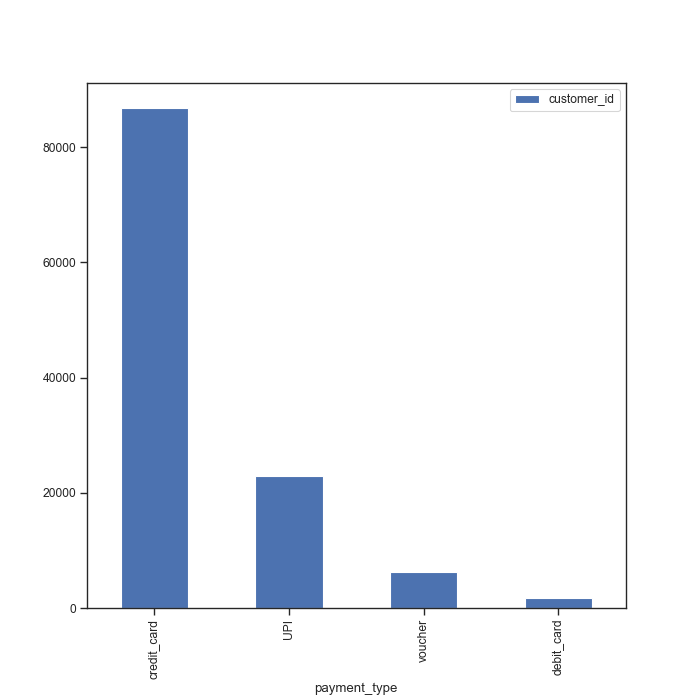

<AxesSubplot:xlabel='payment_type'>

In [365]:
Cust_pay = Order_data[['customer_id','payment_type']]
Cust_pay_type = Cust_pay.groupby('payment_type')['customer_id'].count().sort_values(ascending = False)
Plot_custpay = pd.DataFrame(Cust_pay_type)
Plot_custpay = Plot_custpay.reset_index()
print(Cust_pay_type)
Plot_custpay.plot(x = 'payment_type',y = 'customer_id', kind = 'bar',figsize = (8,8))

# Most number of installment options chosen by the customers.

payment_installments
1     58617
2     13722
3     11756
4      7979
10     6845
5      6017
8      5063
6      4617
7      1828
9       726
12      163
15       92
18       38
24       34
11       25
20       21
13       18
14       16
16        7
17        7
21        5
0         3
22        1
23        1
Name: customer_id, dtype: int64


<IPython.core.display.Javascript object>


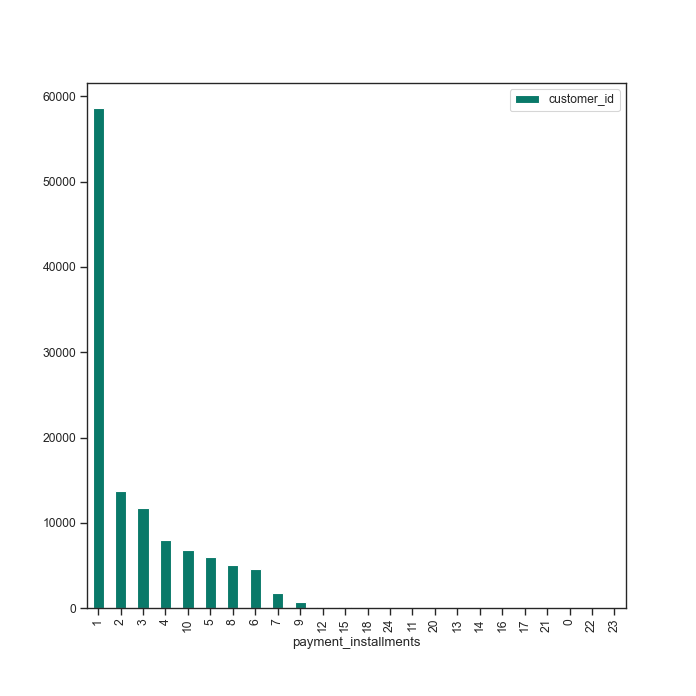

<AxesSubplot:xlabel='payment_installments'>

In [376]:
Cust_installments = Order_data[['customer_id','payment_installments']]
Cust_installments = Cust_installments.groupby('payment_installments')['customer_id'].count().sort_values(ascending = False)
Plot_cust_installments = pd.DataFrame(Cust_installments)
Plot_cust_installments = Plot_cust_installments.reset_index()
print(Cust_installments )
Plot_cust_installments.plot(x = 'payment_installments',y = 'customer_id', kind = 'bar',figsize = (8,8), color = '#097969')

# Top 10 categories rated highest by the customers.

In [386]:
Order_new_data = pd.merge(Order_data, Order_reviews, how = 'inner', left_on = 'order_id', right_on = 'order_id')
Order_new_data = Order_new_data[['order_id','customer_id','review_id','review_score','product_id','product_category_name']]

In [389]:
Order_new_data.duplicated().sum()/Order_new_data.duplicated().count()

0.1291552212314584

In [390]:
Order_new_data = Order_new_data.drop_duplicates()

In [391]:
Order_new_data.duplicated().sum()/Order_new_data.duplicated().count()

0.0

In [428]:
p = Order_new_data[['product_category_name','review_score']]
p_temp = pd.DataFrame(p.sort_values(by = 'review_score', ascending = False))
p_new = pd.Series(p_temp.loc[p_temp.review_score == 5,'product_category_name'])
p_new = p_new.reset_index()
p_new = p_new.product_category_name.drop_duplicates(keep = 'first').head(10)
p_new

0               Sports_Leisure
2                Health_Beauty
3        Computers_Accessories
4                         Toys
5               Bed_Bath_Table
8          Musical_Instruments
9              Furniture_Decor
11                        Food
15    Fashion_Bags_Accessories
16         Luggage_Accessories
Name: product_category_name, dtype: object

# Top 10 categories rated lowest by the customers.

In [433]:
p_last = Order_new_data[['product_category_name','review_score']]
p_last_temp = pd.DataFrame(p_last.sort_values(by = 'review_score', ascending = True))
p_last_new = pd.Series(p_last_temp.loc[p_last_temp.review_score == 1,'product_category_name'])
p_last_new = p_last_new.reset_index()
p_last_new = p_last_new.product_category_name.drop_duplicates(keep = 'first').head(10)
p_last_new

0                       NaN
1            Bed_Bath_Table
2           Furniture_Decor
3            Sports_Leisure
5                      Auto
7                  Pet_Shop
9                 Telephony
11    Computers_Accessories
12                     Toys
14            Watches_Gifts
Name: product_category_name, dtype: object

# Top 10 Products rated highest by the customers.

In [430]:
q = Order_new_data[['product_id','review_score']]
q_temp = pd.DataFrame(q.sort_values(by = 'review_score', ascending = False))
q_new = pd.Series(q_temp.loc[q_temp.review_score == 5,'product_id'])
q_new = q_new.reset_index()
q_new = q_new.product_id.drop_duplicates(keep = 'first').head(10)
q_new

0    d918b3f4aa5272c2c3cd088d087ca069
1    ff3ec972ebd16eb98d55e8ea2fa255ee
2    776ef0ee36e20757c513e64903f1fa8a
3    0d85c435fd60b277ffb9e9b0f88f927a
4    7346d3bfa9ffb6562dde92b426bb5827
5    3d3cd6379eb6ac4e8e617574a1d0d145
6    8b2324a023b9cc0dce6e05c530b5f2b4
7    5e3b4b17383b90a3129e552bd71bf2b8
8    cc82434eb4afd2f81d3c2525e54cbfce
9    0e839be47c2dc028ca3d90e65732b14c
Name: product_id, dtype: object

# Top 10 Products rated lowest by the customers.

In [434]:
q_last = Order_new_data[['product_id','review_score']]
q_last_temp = pd.DataFrame(q_last.sort_values(by = 'review_score', ascending = True))
q_last_new = pd.Series(q_last_temp.loc[q_last_temp.review_score == 1,'product_id'])
q_last_new = q_last_new.reset_index()
q_last_new = q_last_new.product_id.drop_duplicates(keep = 'first').head(10)
q_last_new

0    5a848e4ab52fd5445cdc07aab1c40e48
1    99a4788cb24856965c36a24e339b6058
2    7814c273ab16783d73a9863ebfa8b141
3    6cbbcefd974f08f72023c05064d96f27
4    fbce4c4cb307679d89a3bf3d3bb353b9
5    f6a00327e33d86dea4cd7175577dd8b9
6    65607db9823444a6ba5b7a82431e4502
7    af026a1d23fa6bede158c62c22ca135c
8    0be487faac01dd57fd7ed17cfbdf2dee
9    bf128711128b70eaa9e07df69e9a75e2
Name: product_id, dtype: object

# Average Ratings by Customer location.

In [444]:
Order_final_data = pd.merge(Order_data, Order_new_data, how = 'inner', left_on = 'customer_id', right_on = 'customer_id')
Order_final_data.columns

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_5060/129744209.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'product_category_name_x', 'order_id_x', 'product_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  Order_final_data = pd.merge(Order_data, Order_new_data, how = 'inner', left_on = 'customer_id', right_on = 'customer_id')


Index(['order_id_x', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'year', 'month', 'week', 'day', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'time',
       'order_item_id', 'product_id_x', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_x', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id_y', 'review_id_x', 'review_score_x', 'product_id_y',
       'product_category_name_y', 'order_id_x', 'review_id_y',
       'review_score_y', 'product_id_x', 'product_category

In [445]:
Order_final_data = Order_final_data[['customer_state','seller_state','customer_city','seller_city','product_id_x','product_category_name_x','month','review_score']]
Order_final_data

,customer_state,seller_state,customer_city,seller_city,product_id_x,product_id_x,product_category_name_x,product_category_name_x,month,review_score
0,Andhra Pradesh,Chhattisgarh,Akkarampalle,Chhuikhadan,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,Housewares,Housewares,10,4
1,Andhra Pradesh,Chhattisgarh,Akkarampalle,Chhuikhadan,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,Housewares,Housewares,10,4
2,Andhra Pradesh,Chhattisgarh,Akkarampalle,Chhuikhadan,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,Housewares,Housewares,10,4
3,Chhattisgarh,Andhra Pradesh,Pandariya,Anantapur,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,Perfumery,Perfumery,7,4
4,Chhattisgarh,Gujarat,Dhamdha,Freelandgunj,aa4383b373c6aca5d8797843e5594415,aa4383b373c6aca5d8797843e5594415,Auto,Auto,8,5
...,...,...,...,...,...,...,...,...,...,...
278945,Haryana,Andhra Pradesh,Mahendragarh,Mancherial,f1d4ce8c6dd66c47bbaa8c6781c2a923,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,Baby,2,4
278946,Rajasthan,Andhra Pradesh,Bidasar,Akkarampalle,b80910977a37536adeddd63663f916ad,b80910977a37536adeddd63663f916ad,Home_Appliances_2,Home_Appliances_2,8,5
278947,Punjab,West Bengal,Banaur,Dalurband,d1c427060a0f73f6b889a5c7c61f2ac4,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,Computers_Accessories,1,2
278948,Punjab,West Bengal,Banaur,Dalurband,d1c427060a0f73f6b889a5c7c61f2ac4,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,Computers_Accessories,1,2


In [446]:
Order_final_data.duplicated().sum()/Order_final_data.duplicated().count()

0.6080480372826671

In [447]:
Order_final_data.drop_duplicates()

,customer_state,seller_state,customer_city,seller_city,product_id_x,product_id_x,product_category_name_x,product_category_name_x,month,review_score
0,Andhra Pradesh,Chhattisgarh,Akkarampalle,Chhuikhadan,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,Housewares,Housewares,10,4
3,Chhattisgarh,Andhra Pradesh,Pandariya,Anantapur,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,Perfumery,Perfumery,7,4
4,Chhattisgarh,Gujarat,Dhamdha,Freelandgunj,aa4383b373c6aca5d8797843e5594415,aa4383b373c6aca5d8797843e5594415,Auto,Auto,8,5
5,Punjab,Andhra Pradesh,Kartarpur,Anantapur,d0b61bfb1de832b15ba9d266ca96e5b0,d0b61bfb1de832b15ba9d266ca96e5b0,Pet_Shop,Pet_Shop,11,5
6,Andhra Pradesh,Andhra Pradesh,Bheemavaram,Akkayapalle,65266b2da20d04dbe00c5c2d3bb7859e,65266b2da20d04dbe00c5c2d3bb7859e,Stationery,Stationery,2,5
...,...,...,...,...,...,...,...,...,...,...
278944,Andhra Pradesh,Andhra Pradesh,Bobbili,Koratla,ac35486adb7b02598c182c2ff2e05254,ac35486adb7b02598c182c2ff2e05254,Health_Beauty,Health_Beauty,3,5
278945,Haryana,Andhra Pradesh,Mahendragarh,Mancherial,f1d4ce8c6dd66c47bbaa8c6781c2a923,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,Baby,2,4
278946,Rajasthan,Andhra Pradesh,Bidasar,Akkarampalle,b80910977a37536adeddd63663f916ad,b80910977a37536adeddd63663f916ad,Home_Appliances_2,Home_Appliances_2,8,5
278947,Punjab,West Bengal,Banaur,Dalurband,d1c427060a0f73f6b889a5c7c61f2ac4,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,Computers_Accessories,1,2


In [455]:
Mean_rating_cust_loc = Order_final_data.groupby('customer_state')['review_score'].mean().round(2).sort_values(ascending = False)
print(Mean_rating_cust_loc)

customer_state
Goa                  4.80
West Bengal          4.65
Orissa               3.94
Maharashtra          3.83
Gujarat              3.77
Uttar Pradesh        3.70
Punjab               3.67
Himachal Pradesh     3.67
Karnataka            3.65
Delhi                3.60
Kerala               3.59
Chhattisgarh         3.59
Haryana              3.58
Tamil Nadu           3.40
Madhya Pradesh       3.39
Rajasthan            3.39
Andhra Pradesh       3.39
Uttaranchal          3.17
Arunachal Pradesh    2.81
Jammu & Kashmir      2.14
Name: review_score, dtype: float64


# Average Ratings by Seller location.

In [456]:
Mean_rating_seller_loc = Order_final_data.groupby('seller_state')['review_score'].mean().round(2).sort_values(ascending = False)
print(Mean_rating_seller_loc)

seller_state
Uttaranchal          4.54
Haryana              4.16
Orissa               4.12
Kerala               3.82
Himachal Pradesh     3.82
Jammu & Kashmir      3.77
West Bengal          3.76
Karnataka            3.72
Arunachal Pradesh    3.67
Uttar Pradesh        3.67
Delhi                3.58
Andhra Pradesh       3.58
Tamil Nadu           3.57
Rajasthan            3.47
Madhya Pradesh       3.41
Maharashtra          3.37
Punjab               3.22
Chhattisgarh         3.15
Gujarat              2.94
Name: review_score, dtype: float64


# Average Ratings by Products.

In [466]:
Order_new_data.columns


Index(['order_id', 'customer_id', 'review_id', 'review_score', 'product_id',
       'product_category_name'],
      dtype='object')

In [469]:
Mean_rating_products = Order_new_data.groupby('product_id')['review_score'].mean().sort_values(ascending = False)
print(Mean_rating_products)

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
86743ff92eee3d16b7df59cddd583b8c    5.0
868ceb027ab706a4dee42e2220006b85    5.0
868969d3a93aeeab7bfcd4fc3d3d65de    5.0
868766ed2172644fdd977d6bd395a107    5.0
                                   ... 
ed3f40dab41c0bd6f688e3e3f846b893    1.0
db7c8db5c70ae474fb9caa8c54454854    1.0
08545faed0310009ebba7ba4537c2727    1.0
5e211f15646acded537a9d1646f6a268    1.0
2f0f230a6d1c2189c346d0992df870fa    1.0
Name: review_score, Length: 32951, dtype: float64


# Average Ratings by Product category.

In [472]:
Mean_rating_category = Order_new_data.groupby('product_category_name')['review_score'].mean().round(2).sort_values(ascending = False)
print(Mean_rating_category)

product_category_name
Cds_Dvds_Musicals            4.67
Fashion_Childrens_Clothes    4.50
Books_General_Interest       4.44
Books_Imported               4.39
Food_Drink                   4.38
                             ... 
Fashio_Female_Clothing       3.71
Home_Comfort_2               3.71
Fashion_Male_Clothing        3.62
Office_Furniture             3.59
Security_And_Services        2.50
Name: review_score, Length: 71, dtype: float64


# Average Ratings by Month.

In [473]:
Mean_rating_monthly = Order_final_data.groupby('month')['review_score'].mean().round(2).sort_values(ascending = False)
print(Mean_rating_monthly)

month
5     3.94
6     3.84
7     3.82
11    3.76
12    3.70
9     3.63
4     3.60
8     3.53
2     3.52
3     3.50
1     3.16
10    1.99
Name: review_score, dtype: float64
